<a href="https://colab.research.google.com/github/nikogarro/thesis/blob/main/RUN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.mydrive.ch/shares/43421/11a215a5749fcfb75e331ddd5f8e43ee/download/420938129-1629953099/pill.tar.xz

--2023-09-23 07:19:17--  https://www.mydrive.ch/shares/43421/11a215a5749fcfb75e331ddd5f8e43ee/download/420938129-1629953099/pill.tar.xz
Resolving www.mydrive.ch (www.mydrive.ch)... 91.214.169.64
Connecting to www.mydrive.ch (www.mydrive.ch)|91.214.169.64|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://stor-ch.mydrive.ch/download/09d83e1dce1b4b7784678c2e60e5a565c124be4035804ccc909fccc27ab3ec51?1629953099 [following]
--2023-09-23 07:19:19--  https://stor-ch.mydrive.ch/download/09d83e1dce1b4b7784678c2e60e5a565c124be4035804ccc909fccc27ab3ec51?1629953099
Resolving stor-ch.mydrive.ch (stor-ch.mydrive.ch)... 91.214.169.64
Connecting to stor-ch.mydrive.ch (stor-ch.mydrive.ch)|91.214.169.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275267152 (263M) [application/x-xz]
Saving to: ‘pill.tar.xz’

pill.tar.xz         100%[===================>] 262.51M  12.8MB/s    in 24s     

2023-09-23 07:19:45 (11.1 MB/s) - ‘pill.tar.xz’ saved

In [2]:
!tar -xf pill.tar.xz

In [3]:
import os
import random
import shutil

# Specify the folder path where the files are located
# Source directory containing the files you want to split
source_directory1 = '/content/pill/test/color'
source_directory2 = '/content/pill/test/combined'
source_directory3 = '/content/pill/test/crack'
source_directory4 = '/content/pill/test/faulty_imprint'
source_directory5 = '/content/pill/test/scratch'
source_directory6 = '/content/pill/test/contamination'

source_dir_list = [source_directory1, source_directory2, source_directory3, source_directory4, source_directory5, source_directory6]
for source_directory in source_dir_list:

    # Get a list of all files in the folder
    file_list = os.listdir(source_directory)

    # Define a new name format (e.g., prefix + index + extension)
    new_name_prefix = source_directory.split("/")[-1]
    index = 0  # Start index
    extension = '.png'  # Change this to the desired file extension

    # Iterate through the files and rename them
    for old_name in file_list:
        # Construct the new name for the file
        new_name = f"{new_name_prefix}_{index:03d}{extension}"  # 04d ensures 4-digit index

        # Create the full file paths for old and new names
        old_file_path = os.path.join(source_directory, old_name)
        new_file_path = os.path.join(source_directory, new_name)

        # Rename the file
        os.rename(old_file_path, new_file_path)

        # Increment the index for the next file
        index += 1

print("Files renamed successfully.")

Files renamed successfully.


In [4]:
# Destination directories for the two splits
destination_directory1 = '/content/pill/test/anomaly'
destination_directory2 = '/content/pill/train/anomaly'

os.makedirs(destination_directory1, exist_ok=True)
os.makedirs(destination_directory2, exist_ok=True)

# Probability of a file being placed in destination_directory1
split_ratio = 0.1  # You can adjust this as needed

for source_directory in source_dir_list:

    # Get a list of all files in the source directory
    file_list = os.listdir(source_directory)

    # Shuffle the list to randomize the file order
    random.shuffle(file_list)

    # Determine the number of files to put in each destination directory
    split_point = int(len(file_list) * split_ratio)

    # Copy files to the destination directories based on the split ratio
    for i, file_name in enumerate(file_list):
        source_file_path = os.path.join(source_directory, file_name)

        if i < split_point:
            destination_file_path = os.path.join(destination_directory1, file_name)
        else:
            destination_file_path = os.path.join(destination_directory2, file_name)

        # Copy the file to the appropriate destination
        shutil.copy(source_file_path, destination_file_path)

    print(f"Split {len(file_list)} files from {source_directory} into {split_point} files in {destination_directory1} and {len(file_list) - split_point} files in {destination_directory2}.")

Split 25 files from /content/pill/test/color into 2 files in /content/pill/test/anomaly and 23 files in /content/pill/train/anomaly.
Split 17 files from /content/pill/test/combined into 1 files in /content/pill/test/anomaly and 16 files in /content/pill/train/anomaly.
Split 26 files from /content/pill/test/crack into 2 files in /content/pill/test/anomaly and 24 files in /content/pill/train/anomaly.
Split 19 files from /content/pill/test/faulty_imprint into 1 files in /content/pill/test/anomaly and 18 files in /content/pill/train/anomaly.
Split 24 files from /content/pill/test/scratch into 2 files in /content/pill/test/anomaly and 22 files in /content/pill/train/anomaly.
Split 21 files from /content/pill/test/contamination into 2 files in /content/pill/test/anomaly and 19 files in /content/pill/train/anomaly.


In [5]:
folder_to_delet = source_dir_list.append('/content/pill/test/pill_type')
for source_directory in source_dir_list:

    # Specify the path to the folder you want to delete
    folder_to_delete = source_directory

    # Use shutil.rmtree() to delete the folder and its contents
    try:
        shutil.rmtree(folder_to_delete)
        print(f"Folder '{folder_to_delete}' and its contents have been successfully deleted.")
    except Exception as e:
        print(f"Error deleting folder: {e}")

Folder '/content/pill/test/color' and its contents have been successfully deleted.
Folder '/content/pill/test/combined' and its contents have been successfully deleted.
Folder '/content/pill/test/crack' and its contents have been successfully deleted.
Folder '/content/pill/test/faulty_imprint' and its contents have been successfully deleted.
Folder '/content/pill/test/scratch' and its contents have been successfully deleted.
Folder '/content/pill/test/contamination' and its contents have been successfully deleted.
Folder '/content/pill/test/pill_type' and its contents have been successfully deleted.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, EfficientNetB0, VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [7]:
train_dir = '/content/pill/train'
test_dir = '/content/pill/test'

In [8]:
BATCH_SIZE = 10
IMG_SIZE = (224, 224)

In [9]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 389 files belonging to 2 classes.


In [10]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 36 files belonging to 2 classes.


Δείξε τις 9 πρώτες εικόνες από το set εκπαίδευσης

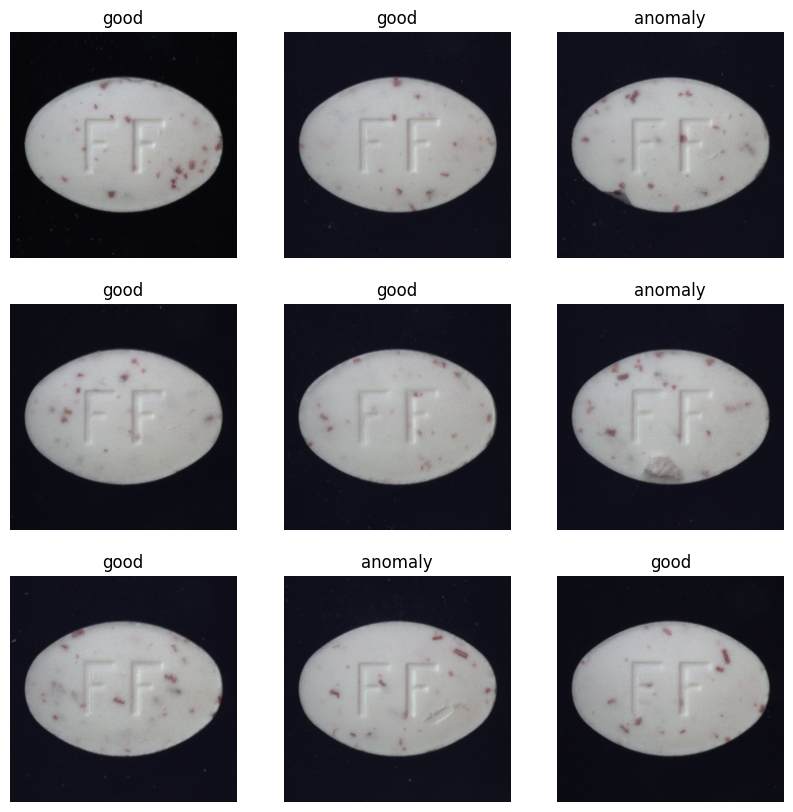

In [11]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Configure the dataset for performance

Use buffered prefetching to load images from disk without having I/O become blocking. To learn more about this method see the [data performance](https://www.tensorflow.org/guide/data_performance) guide.

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

### Use data augmentation

When you don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random, yet realistic, transformations to the training images, such as rotation and horizontal flipping. This helps expose the model to different aspects of the training data and reduce [overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit). You can learn more about data augmentation in this [tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation).

In [ ]:
# aug_ds = test_dataset.map(
#   lambda x, y: (data_augmentation(x), y))

Αλλαζουμε το fill mode σε nearest αντι του default mirror που θα βαλει στην εικόνα τις ακρές του χαπιού

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation(0.2, fill_mode='nearest'),
])

Let's repeatedly apply these layers to the same image and see the result.

NameError: ignored

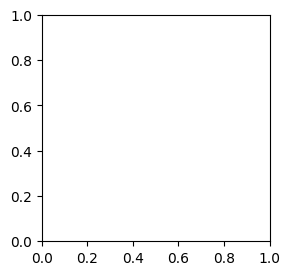

In [13]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

### Rescale pixel values

In a moment, you will download `tf.keras.applications.MobileNetV2` for use as your base model. This model expects pixel values in `[-1, 1]`, but at this point, the pixel values in your images are in `[0, 255]`. To rescale them, use the preprocessing method included with the model.

In [14]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

Note: Alternatively, you could rescale pixel values from `[0, 255]` to `[-1, 1]` using `tf.keras.layers.Rescaling`.

In [ ]:
#rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

Note: If using other `tf.keras.applications`, be sure to check the API doc to determine if they expect pixels in `[-1, 1]` or `[0, 1]`, or use the included `preprocess_input` function.

## Create the base model from the pre-trained convnets
You will create the base model from the **MobileNet V2** model developed at Google. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like `jackfruit` and `syringe`. This base of knowledge will help us classify cats and dogs from our specific dataset.

First, you need to pick which layer of MobileNet V2 you will use for feature extraction. The very last classification layer (on "top", as most diagrams of machine learning models go from bottom to top) is not very useful. Instead, you will follow the common practice to depend on the very last layer before the flatten operation. This layer is called the "bottleneck layer". The bottleneck layer features retain more generality as compared to the final/top layer.

First, instantiate a MobileNet V2 model pre-loaded with weights trained on ImageNet. By specifying the **include_top=False** argument, you load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [15]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 1s 0us/step


This feature extractor converts each `224x224x3` image into a `7x7x1280` block of features. Let's see what it does to an example batch of images:

In [16]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(10, 7, 7, 1280)


## Feature extraction
In this step, you will freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.

### Freeze the convolutional base

It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. MobileNet V2 has many layers, so setting the entire model's `trainable` flag to False will freeze all of them.

In [17]:
base_model.trainable = False

### Important note about BatchNormalization layers

Many models contain `tf.keras.layers.BatchNormalization` layers. This layer is a special case and precautions should be taken in the context of fine-tuning, as shown later in this tutorial.

When you set `layer.trainable = False`, the `BatchNormalization` layer will run in inference mode, and will not update its mean and variance statistics.

When you unfreeze a model that contains BatchNormalization layers in order to do fine-tuning, you should keep the BatchNormalization layers in inference mode by passing `training = False` when calling the base model. Otherwise, the updates applied to the non-trainable weights will destroy what the model has learned.

For more details, see the [Transfer learning guide](https://www.tensorflow.org/guide/keras/transfer_learning).

In [18]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

### Add a classification head

To generate predictions from the block of features, average over the spatial `7x7` spatial locations, using a `tf.keras.layers.GlobalAveragePooling2D` layer to convert the features to  a single 1280-element vector per image.

In [19]:
global_average_layer = GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(10, 1280)


Apply a `tf.keras.layers.Dense` layer to convert these features into a single prediction per image. You don't need an activation function here because this prediction will be treated as a `logit`, or a raw prediction value. Positive numbers predict class 1, negative numbers predict class 0.

In [20]:
prediction_layer = Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(10, 1)


Build a model by chaining together the data augmentation, rescaling, `base_model` and feature extractor layers using the [Keras Functional API](https://www.tensorflow.org/guide/keras/functional). As previously mentioned, use `training=False` as our model contains a `BatchNormalization` layer.

In [21]:
inputs = tf.keras.Input(shape=(224, 224, 3))
#x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.Flatten()(x)
x = Dense(1024)(x)
x = Dense(512)(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = Dense(1)(x)
model = tf.keras.Model(inputs, outputs)

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                             

The 8+ million parameters in MobileNet are frozen, but there are 1.2 thousand _trainable_ parameters in the Dense layer. These are divided between two `tf.Variable` objects, the weights and biases.

In [23]:
len(model.trainable_variables)

6

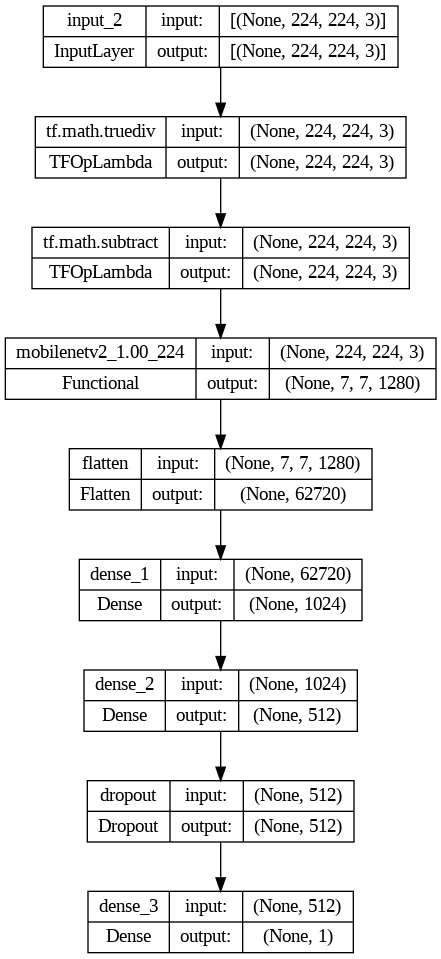

In [24]:
tf.keras.utils.plot_model(model, show_shapes=True)

Creating a custom callbak that stops training when training accuracy exceeds 99.5%

In [25]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.995:
                print("\nReached 99.5% accuracy so cancelling training!")

                # Stop training once the above condition is met
                self.model.stop_training = True

callbacks = myCallback()

### Compile the model

Compile the model before training it. Since there are two classes, use the `tf.keras.losses.BinaryCrossentropy` loss with `from_logits=True` since the model provides a linear output.

In [26]:
base_learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

### Train the model

After training for 10 epochs, you should see ~96% accuracy on the validation set.


In [27]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(test_dataset)

4/4 [==============================] - 3s 165ms/step - loss: 1.6743 - accuracy: 0.2778


In [28]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 1.67
initial accuracy: 0.28


In [29]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset,
                    callbacks=[callbacks])

Epoch 1/10
39/39 [==============================] - 17s 261ms/step - loss: 13.7730 - accuracy: 0.6144 - val_loss: 2.3884 - val_accuracy: 0.7222
Epoch 2/10
39/39 [==============================] - 9s 194ms/step - loss: 5.4483 - accuracy: 0.6504 - val_loss: 2.2151 - val_accuracy: 0.7500
Epoch 3/10
39/39 [==============================] - 8s 171ms/step - loss: 3.5738 - accuracy: 0.7404 - val_loss: 2.6062 - val_accuracy: 0.6389
Epoch 4/10
39/39 [==============================] - 8s 153ms/step - loss: 3.5090 - accuracy: 0.7841 - val_loss: 1.6143 - val_accuracy: 0.8056
Epoch 5/10
39/39 [==============================] - 9s 172ms/step - loss: 2.6093 - accuracy: 0.7969 - val_loss: 1.9224 - val_accuracy: 0.8333
Epoch 6/10
39/39 [==============================] - 9s 189ms/step - loss: 2.9557 - accuracy: 0.8406 - val_loss: 9.6290 - val_accuracy: 0.4722
Epoch 7/10
39/39 [==============================] - 7s 153ms/step - loss: 2.3148 - accuracy: 0.8535 - val_loss: 8.5114 - val_accuracy: 0.7222
Epoc

### Learning curves

Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNetV2 base model as a fixed feature extractor.

In [30]:
def graph(history, model):
    acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']

    loss = history.history['loss']
    test_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(test_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy for ' + model)

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(test_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0, 10.0])
    plt.title('Training and Validation Loss for ' + model)
    plt.xlabel('epoch')
    plt.show()

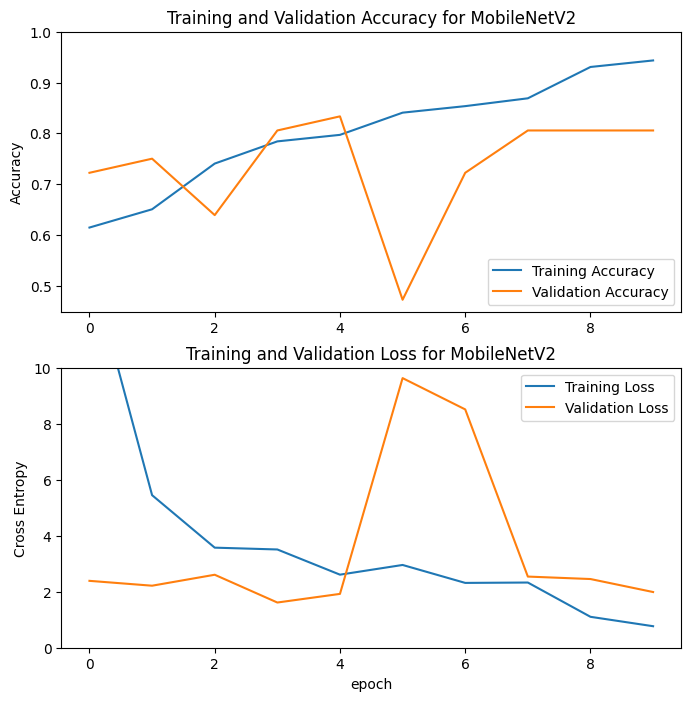

In [31]:
graph(history, 'MobileNetV2')

Note: If you are wondering why the validation metrics are clearly better than the training metrics, the main factor is because layers like `tf.keras.layers.BatchNormalization` and `tf.keras.layers.Dropout` affect accuracy during training. They are turned off when calculating validation loss.

To a lesser extent, it is also because training metrics report the average for an epoch, while validation metrics are evaluated after the epoch, so validation metrics see a model that has trained slightly longer.

## Fine tuning
In the feature extraction experiment, you were only training a few layers on top of an MobileNetV2 base model. The weights of the pre-trained network were **not** updated during training.

One way to increase performance even further is to train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the classifier you added. The training process will force the weights to be tuned from generic feature maps to features associated specifically with the dataset.

Note: This should only be attempted after you have trained the top-level classifier with the pre-trained model set to non-trainable. If you add a randomly initialized classifier on top of a pre-trained model and attempt to train all layers jointly, the magnitude of the gradient updates will be too large (due to the random weights from the classifier) and your pre-trained model will forget what it has learned.

Also, you should try to fine-tune a small number of top layers rather than the whole MobileNet model. In most convolutional networks, the higher up a layer is, the more specialized it is. The first few layers learn very simple and generic features that generalize to almost all types of images. As you go higher up, the features are increasingly more specific to the dataset on which the model was trained. The goal of fine-tuning is to adapt these specialized features to work with the new dataset, rather than overwrite the generic learning.

### Un-freeze the top layers of the model


All you need to do is unfreeze the `base_model` and set the bottom layers to be un-trainable. Then, you should recompile the model (necessary for these changes to take effect), and resume training.

In [32]:
base_model.trainable = True

In [33]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 120

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


### Compile the model

As you are training a much larger model and want to readapt the pretrained weights, it is important to use a lower learning rate at this stage. Otherwise, your model could overfit very quickly.

In [34]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [35]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                             

In [36]:
len(model.trainable_variables)

42

### Continue training the model

If you trained to convergence earlier, this step will improve your accuracy by a few percentage points.

In [37]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset,
                         callbacks=[callbacks])

Epoch 10/20
39/39 [==============================] - 21s 207ms/step - loss: 1.5279 - accuracy: 0.9126 - val_loss: 5.1835 - val_accuracy: 0.7222
Epoch 11/20
39/39 [==============================] - 9s 193ms/step - loss: 0.7975 - accuracy: 0.9332 - val_loss: 2.6306 - val_accuracy: 0.8056
Epoch 12/20
39/39 [==============================] - 7s 155ms/step - loss: 0.4239 - accuracy: 0.9614 - val_loss: 3.1400 - val_accuracy: 0.8056
Epoch 13/20
39/39 [==============================] - 9s 190ms/step - loss: 0.3141 - accuracy: 0.9692 - val_loss: 1.9477 - val_accuracy: 0.8611
Epoch 14/20
39/39 [==============================] - 10s 192ms/step - loss: 0.3980 - accuracy: 0.9537 - val_loss: 2.0179 - val_accuracy: 0.8056
Epoch 15/20
39/39 [==============================] - 7s 156ms/step - loss: 0.3034 - accuracy: 0.9640 - val_loss: 2.1821 - val_accuracy: 0.8056
Epoch 16/20
39/39 [==============================] - 9s 193ms/step - loss: 0.1794 - accuracy: 0.9666 - val_loss: 1.6823 - val_accuracy: 0.80

Let's take a look at the learning curves of the training and validation accuracy/loss when fine-tuning the last few layers of the MobileNetV2 base model and training the classifier on top of it. The validation loss is much higher than the training loss, so you may get some overfitting.

You may also get some overfitting as the new training set is relatively small and similar to the original MobileNetV2 datasets.


After fine tuning the model nearly reaches 98% accuracy on the validation set.

In [38]:
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

loss = history.history['loss']
test_loss = history.history['val_loss']

In [39]:
def fine_tuned_graph(history_fine, acc, test_acc, loss, test_loss, model):
    acc += history_fine.history['accuracy']
    test_acc += history_fine.history['val_accuracy']

    loss += history_fine.history['loss']
    test_loss += history_fine.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(test_acc, label='Validation Accuracy')
    plt.ylim([0.5, 1])
    plt.plot([initial_epochs-1,initial_epochs-1],
        plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy for ' + model)

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(test_loss, label='Validation Loss')
    plt.ylim([0, 10.0])
    plt.plot([initial_epochs-1,initial_epochs-1],
        plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss for ' + model)
    plt.xlabel('epoch')
    plt.show()

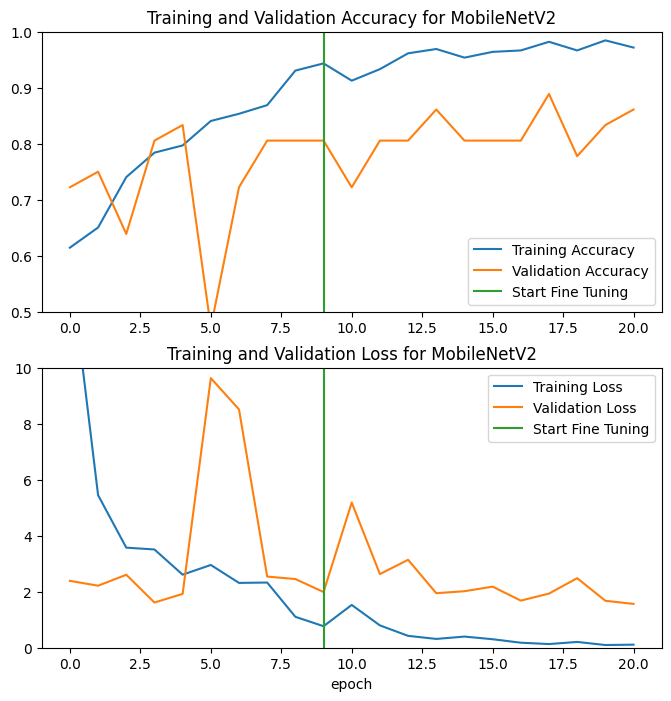

In [40]:
fine_tuned_graph(history_fine, acc, test_acc, loss, test_loss, 'MobileNetV2')

### Evaluation and prediction

Finally you can verify the performance of the model on new data using test set.

In [41]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

4/4 [==============================] - 1s 30ms/step - loss: 1.5648 - accuracy: 0.8611
Test accuracy : 0.8611111044883728


And now you are all set to use this model to predict if your pill's are good or bad

Predictions:
 [0 1 1 1 0 1 0 1 1 1]
Labels:
 [0 1 1 1 1 1 0 0 1 1]


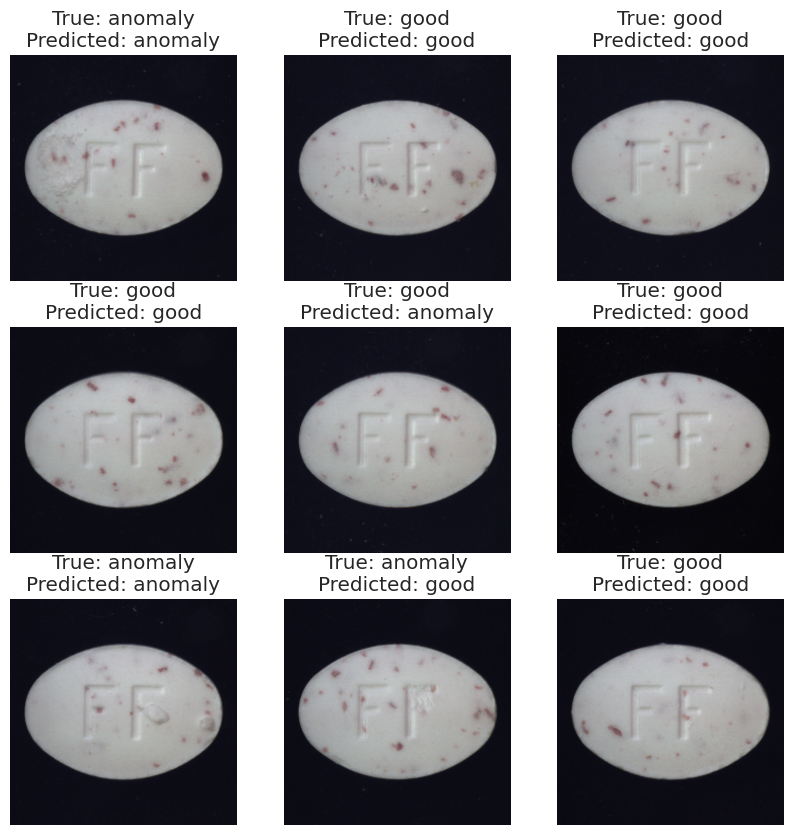

In [158]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  true_label = class_names[label_batch[i]]  # Get the true label
  predicted_label = class_names[predictions[i]]  # Get the predicted label
  title = f"True: {true_label}\nPredicted: {predicted_label}"
  plt.title(title)
  plt.axis("off")

Στατιστικα στοιχεία για το μοντέλο

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [45]:
y_pred = model.predict(test_dataset)
print(y_pred)
preds = tf.nn.sigmoid(y_pred.flatten())
predicted_categories = tf.where(preds < 0.5, 0, 1)
print(predicted_categories)
true_categories  = tf.concat([y for x, y in test_dataset], axis=0)
print(true_categories)
confusion_mat = confusion_matrix(true_categories, predicted_categories)
print(confusion_mat)

4/4 [==============================] - 2s 26ms/step
[[ 31.609795 ]
 [ 20.741165 ]
 [ 19.667141 ]
 [ 38.408897 ]
 [ -0.5566809]
 [ 20.112982 ]
 [ 40.009872 ]
 [ -4.72311  ]
 [ 22.290766 ]
 [  8.470854 ]
 [ 27.263807 ]
 [  8.585621 ]
 [-19.910406 ]
 [  0.5327283]
 [ 18.492428 ]
 [ 29.207186 ]
 [ 11.3648205]
 [-31.543282 ]
 [-27.891138 ]
 [  8.5351305]
 [ 12.752848 ]
 [-11.728527 ]
 [  8.7694235]
 [-19.312319 ]
 [ -7.0842395]
 [ 16.254742 ]
 [-10.582376 ]
 [ 23.644825 ]
 [  5.071051 ]
 [ 14.207185 ]
 [  6.2940793]
 [-11.267108 ]
 [-31.025831 ]
 [  3.9659848]
 [-22.497517 ]
 [ -9.308038 ]]
tf.Tensor([1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0], shape=(36,), dtype=int32)
tf.Tensor([0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1], shape=(36,), dtype=int32)
[[ 3  7]
 [10 16]]


In [46]:
print(classification_report(true_categories, predicted_categories, digits=3, target_names=['Good', 'Anomaly']))

              precision    recall  f1-score   support

        Good      0.231     0.300     0.261        10
     Anomaly      0.696     0.615     0.653        26

    accuracy                          0.528        36
   macro avg      0.463     0.458     0.457        36
weighted avg      0.567     0.528     0.544        36



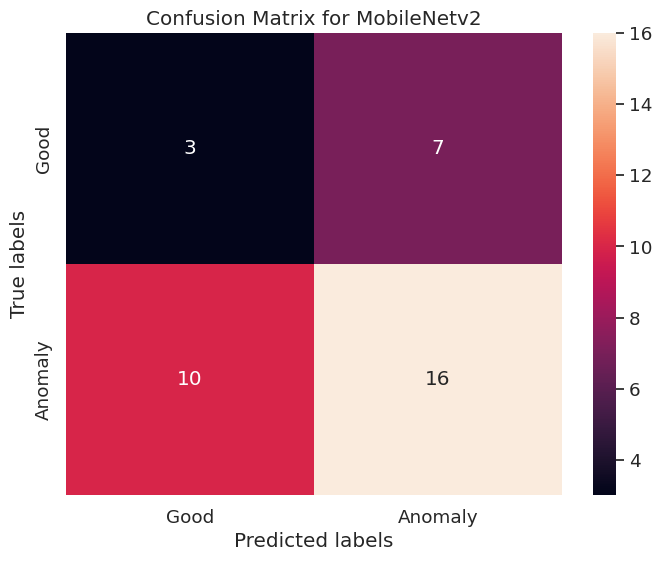

In [164]:
class_labels = ["Good", "Anomaly"]  # Replace with your class labels

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MobileNetv2')
plt.show()

## Summary

* **Using a pre-trained model for feature extraction**:  When working with a small dataset, it is a common practice to take advantage of features learned by a model trained on a larger dataset in the same domain. This is done by instantiating the pre-trained model and adding a fully-connected classifier on top. The pre-trained model is "frozen" and only the weights of the classifier get updated during training.
In this case, the convolutional base extracted all the features associated with each image and you just trained a classifier that determines the image class given that set of extracted features.

* **Fine-tuning a pre-trained model**: To further improve performance, one might want to repurpose the top-level layers of the pre-trained models to the new dataset via fine-tuning.
In this case, you tuned your weights such that your model learned high-level features specific to the dataset. This technique is usually recommended when the training dataset is large and very similar to the original dataset that the pre-trained model was trained on.

To learn more, visit the [Transfer learning guide](https://www.tensorflow.org/guide/keras/transfer_learning).


Ας δούμε πως συγκρίνεται η  απόδοση του **MobileNet V2** με άλλα δημοφιλή μοντέλα.

In [48]:
# Define the pre-trained models you want to compare
base_model1 = VGG16(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)
base_model2 = ResNet50(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)
base_model3 = InceptionV3(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)
base_model4 = EfficientNetB0(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)
base_model5 = VGG19(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 5s 0us/step


### Rescale pixel values

In a moment, you will download `tf.keras.applications.VGG16` for use as your base model. This model expects pixel values in `[-1, 1]`, but at this point, the pixel values in your images are in `[0, 255]`. To rescale them, use the preprocessing method included with the model.

In [49]:
preprocess_input1 = tf.keras.applications.vgg16.preprocess_input
preprocess_input2 = tf.keras.applications.resnet50.preprocess_input
preprocess_input3 = tf.keras.applications.inception_v3.preprocess_input
preprocess_input4 = tf.keras.applications.efficientnet.preprocess_input
preprocess_input5 = tf.keras.applications.vgg19.preprocess_input

Note: If using other `tf.keras.applications`, be sure to check the API doc to determine if they expect pixels in `[-1, 1]` or `[0, 1]`, or use the included `preprocess_input` function.

## Create the base model from the pre-trained convnets
You will create the base model from the **VGG16** model developed at Google. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like `jackfruit` and `syringe`. This base of knowledge will help us classify cats and dogs from our specific dataset.

First, you need to pick which layer of MobileNet V2 you will use for feature extraction. The very last classification layer (on "top", as most diagrams of machine learning models go from bottom to top) is not very useful. Instead, you will follow the common practice to depend on the very last layer before the flatten operation. This layer is called the "bottleneck layer". The bottleneck layer features retain more generality as compared to the final/top layer.

First, instantiate a MobileNet V2 model pre-loaded with weights trained on ImageNet. By specifying the **include_top=False** argument, you load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

This feature extractor converts each `224x224x3` image into a `7x7x512` block of features. Let's see what it does to an example batch of images:

In [50]:
image_batch1, label_batch1 = next(iter(train_dataset))
feature_batch1 = base_model1(image_batch1)
print(feature_batch1.shape)

(10, 7, 7, 512)


This feature extractor converts each `224x224x3` image into a `7x7x2048` block of features. Let's see what it does to an example batch of images:

In [51]:
image_batch2, label_batch2 = next(iter(train_dataset))
feature_batch2 = base_model2(image_batch2)
print(feature_batch2.shape)

(10, 7, 7, 2048)


This feature extractor converts each `224x224x3` image into a `7x7x2048` block of features. Let's see what it does to an example batch of images:

In [52]:
image_batch3, label_batch3 = next(iter(train_dataset))
feature_batch3 = base_model3(image_batch3)
print(feature_batch3.shape)

(10, 5, 5, 2048)


This feature extractor converts each `224x224x3` image into a `7x7x1280` block of features. Let's see what it does to an example batch of images:

In [53]:
image_batch4, label_batch4 = next(iter(train_dataset))
feature_batch4 = base_model4(image_batch4)
print(feature_batch4.shape)

(10, 7, 7, 1280)


This feature extractor converts each `224x224x3` image into a `7x7x512` block of features. Let's see what it does to an example batch of images:

In [54]:
image_batch5, label_batch5 = next(iter(train_dataset))
feature_batch5 = base_model5(image_batch5)
print(feature_batch5.shape)

(10, 7, 7, 512)


## Feature extraction
In this step, you will freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.

### Freeze the convolutional base

It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. MobileNet V2 has many layers, so setting the entire model's `trainable` flag to False will freeze all of them.

In [55]:
base_model1.trainable = False
base_model2.trainable = False
base_model3.trainable = False
base_model4.trainable = False
base_model5.trainable = False

### Important note about BatchNormalization layers

Many models contain `tf.keras.layers.BatchNormalization` layers. This layer is a special case and precautions should be taken in the context of fine-tuning, as shown later in this tutorial.

When you set `layer.trainable = False`, the `BatchNormalization` layer will run in inference mode, and will not update its mean and variance statistics.

When you unfreeze a model that contains BatchNormalization layers in order to do fine-tuning, you should keep the BatchNormalization layers in inference mode by passing `training = False` when calling the base model. Otherwise, the updates applied to the non-trainable weights will destroy what the model has learned.

For more details, see the [Transfer learning guide](https://www.tensorflow.org/guide/keras/transfer_learning).

In [56]:
# Let's take a look at the base model architecture
base_model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [57]:
base_model2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [58]:
base_model3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [59]:
base_model4.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0

In [60]:
base_model5.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Global Average Pooling2d

In [61]:
global_average_layer1 = GlobalAveragePooling2D()
feature_batch_average1 = global_average_layer1(feature_batch1)
print(feature_batch_average1.shape)
global_average_layer2 = GlobalAveragePooling2D()
feature_batch_average2 = global_average_layer2(feature_batch2)
print(feature_batch_average2.shape)
global_average_layer3 = GlobalAveragePooling2D()

feature_batch_average3 = global_average_layer3(feature_batch3)
print(feature_batch_average3.shape)
global_average_layer4 = GlobalAveragePooling2D()

feature_batch_average4 = global_average_layer4(feature_batch4)
print(feature_batch_average4.shape)
global_average_layer5 = GlobalAveragePooling2D()

feature_batch_average5 = global_average_layer5(feature_batch5)
print(feature_batch_average5.shape)

(10, 512)
(10, 2048)
(10, 2048)
(10, 1280)
(10, 512)


Prediction Layer

In [62]:
prediction_layer1 = Dense(1)
prediction_batch1 = prediction_layer1(feature_batch_average1)
print(prediction_batch1.shape)
prediction_layer2 = Dense(1)
prediction_batch2 = prediction_layer2(feature_batch_average2)
print(prediction_batch2.shape)
prediction_layer3 = Dense(1)
prediction_batch3 = prediction_layer3(feature_batch_average3)
print(prediction_batch3.shape)
prediction_layer4 = Dense(1)
prediction_batch4 = prediction_layer4(feature_batch_average4)
print(prediction_batch4.shape)
prediction_layer5 = Dense(1)
prediction_batch5 = prediction_layer5(feature_batch_average5)
print(prediction_batch5.shape)

(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


In [64]:
inputs = tf.keras.Input(shape=(224, 224, 3))
#x = data_augmentation(inputs)
x = preprocess_input1(inputs)
x = base_model1(x, training=False)
#x = global_average_layer1(x)
x = tf.keras.layers.Flatten()(x)
x = Dense(1024)(x)
x = Dense(512)(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = Dense(1)(x)
model1 = tf.keras.Model(inputs, outputs)

In [65]:
inputs = tf.keras.Input(shape=(224, 224, 3))
#x = data_augmentation(inputs)
x = preprocess_input2(inputs)
x = base_model2(x, training=False)
#x = global_average_layer2(x)
x = tf.keras.layers.Flatten()(x)
x = Dense(1024)(x)
x = Dense(512)(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = Dense(1)(x)
model2 = tf.keras.Model(inputs, outputs)

In [66]:
inputs = tf.keras.Input(shape=(224, 224, 3))
#x = data_augmentation(inputs)
x = preprocess_input3(inputs)
x = base_model3(x, training=False)
#x = global_average_layer3(x)
x = tf.keras.layers.Flatten()(x)
x = Dense(1024)(x)
x = Dense(512)(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = Dense(1)(x)
model3 = tf.keras.Model(inputs, outputs)

In [67]:
inputs = tf.keras.Input(shape=(224, 224, 3))
#x = data_augmentation(inputs)
x = preprocess_input4(inputs)
x = base_model4(x, training=False)
#x = global_average_layer4(x)
x = tf.keras.layers.Flatten()(x)
x = Dense(1024)(x)
x = Dense(512)(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = Dense(1)(x)
model4 = tf.keras.Model(inputs, outputs)

In [69]:
inputs = tf.keras.Input(shape=(224, 224, 3))
#x = data_augmentation(inputs)
x = preprocess_input5(inputs)
x = base_model5(x, training=False)
#x = global_average_layer5(x)
x = tf.keras.layers.Flatten()(x)
x = Dense(1024)(x)
x = Dense(512)(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = Dense(1)(x)
model5 = tf.keras.Model(inputs, outputs)

In [70]:
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 1024)              2569

In [71]:
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_1  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_12 (Dense)            (None, 1024)              1027

In [72]:
model3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_15 (Dense)            (None, 1024)              5242

In [73]:
model4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_18 (Dense)            (None, 1024)              64226304  
                                                                 
 dense_19 (Dense)            (None, 512)               524800    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                           

In [74]:
model5.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_3  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_3 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_24 (Dense)            (None, 1024)              2569

In [75]:
print("Amount of trainable variables for model 1", len(model1.trainable_variables))

Amount of trainable variables for model 1 6


In [76]:
print("Amount of trainable variables for model 2", len(model2.trainable_variables))

Amount of trainable variables for model 2 6


In [77]:
len(model3.trainable_variables)

6

In [78]:
len(model4.trainable_variables)

6

In [79]:
len(model5.trainable_variables)

6

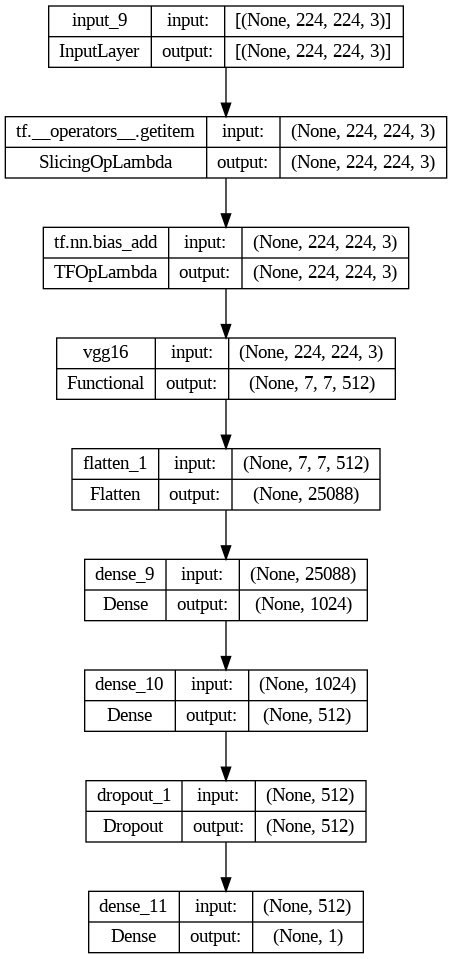

In [80]:
tf.keras.utils.plot_model(model1, show_shapes=True)

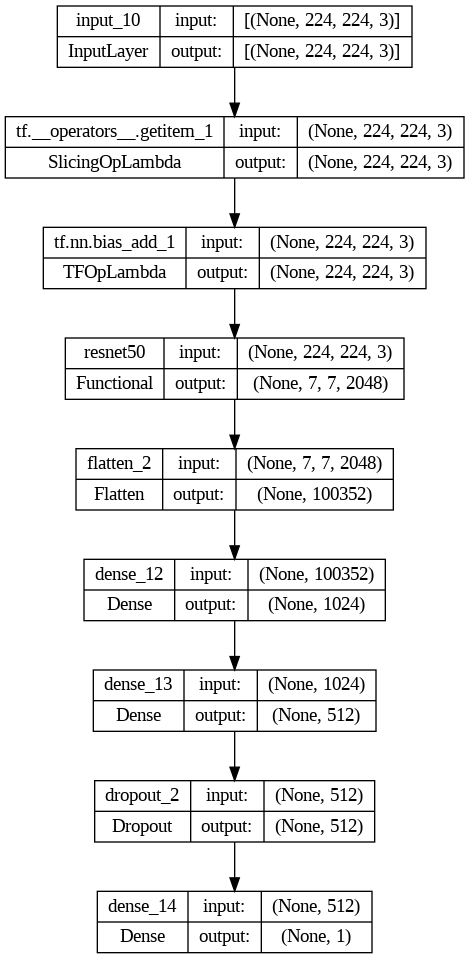

In [81]:
tf.keras.utils.plot_model(model2, show_shapes=True)

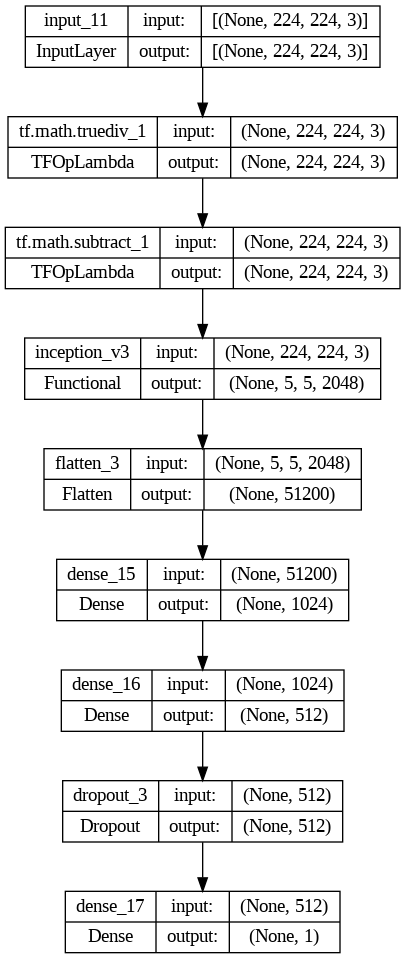

In [82]:
tf.keras.utils.plot_model(model3, show_shapes=True)

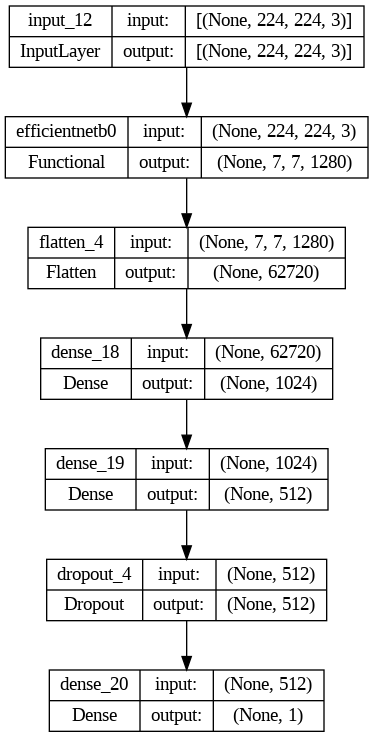

In [83]:
tf.keras.utils.plot_model(model4, show_shapes=True)

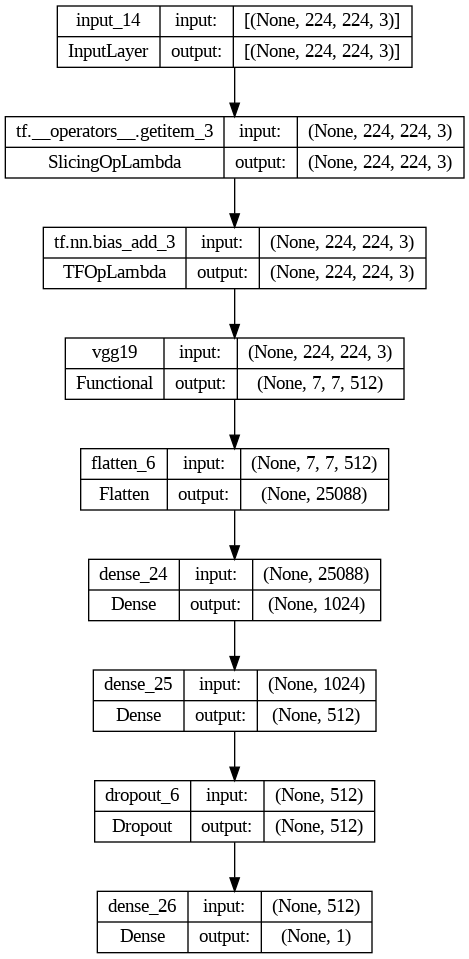

In [84]:
tf.keras.utils.plot_model(model5, show_shapes=True)

In [85]:
base_learning_rate = 0.0001
model1.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [86]:
model2.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [87]:
model3.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [88]:
model4.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [89]:
model5.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [90]:
initial_epochs = 10

loss1, accuracy1 = model1.evaluate(test_dataset)

4/4 [==============================] - 5s 465ms/step - loss: 2.4495 - accuracy: 0.5278


In [91]:
loss2, accuracy2 = model2.evaluate(test_dataset)

4/4 [==============================] - 3s 228ms/step - loss: 4.6546 - accuracy: 0.2778


In [92]:
loss3, accuracy3 = model3.evaluate(test_dataset)

4/4 [==============================] - 6s 889ms/step - loss: 1.0224 - accuracy: 0.3889


In [93]:
loss4, accuracy4 = model4.evaluate(test_dataset)

4/4 [==============================] - 4s 174ms/step - loss: 2.2474 - accuracy: 0.2778


In [94]:
loss5, accuracy5 = model5.evaluate(test_dataset)

4/4 [==============================] - 1s 66ms/step - loss: 1.5970 - accuracy: 0.5556


In [95]:
print("initial loss: {:.2f}".format(loss1))
print("initial accuracy: {:.2f}".format(accuracy1))

initial loss: 2.45
initial accuracy: 0.53


In [96]:
print("initial loss: {:.2f}".format(loss2))
print("initial accuracy: {:.2f}".format(accuracy2))

initial loss: 4.65
initial accuracy: 0.28


In [97]:
print("initial loss: {:.2f}".format(loss3))
print("initial accuracy: {:.2f}".format(accuracy3))

initial loss: 1.02
initial accuracy: 0.39


In [98]:
print("initial loss: {:.2f}".format(loss4))
print("initial accuracy: {:.2f}".format(accuracy4))

initial loss: 2.25
initial accuracy: 0.28


In [99]:
print("initial loss: {:.2f}".format(loss5))
print("initial accuracy: {:.2f}".format(accuracy5))

initial loss: 1.60
initial accuracy: 0.56


In [100]:
history1 = model1.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset,
                    callbacks=[callbacks])

Epoch 1/10
39/39 [==============================] - 13s 240ms/step - loss: 11.6727 - accuracy: 0.6581 - val_loss: 2.5834 - val_accuracy: 0.7500
Epoch 2/10
39/39 [==============================] - 8s 174ms/step - loss: 4.2809 - accuracy: 0.8046 - val_loss: 0.8553 - val_accuracy: 0.8611
Epoch 3/10
39/39 [==============================] - 8s 160ms/step - loss: 3.2374 - accuracy: 0.8303 - val_loss: 0.8523 - val_accuracy: 0.9167
Epoch 4/10
39/39 [==============================] - 9s 206ms/step - loss: 2.4643 - accuracy: 0.8689 - val_loss: 1.0827 - val_accuracy: 0.9444
Epoch 5/10
39/39 [==============================] - 7s 160ms/step - loss: 1.2169 - accuracy: 0.9100 - val_loss: 1.8107 - val_accuracy: 0.8889
Epoch 6/10
39/39 [==============================] - 7s 160ms/step - loss: 0.5958 - accuracy: 0.9434 - val_loss: 1.2491 - val_accuracy: 0.9444
Epoch 7/10
39/39 [==============================] - 9s 197ms/step - loss: 0.6776 - accuracy: 0.9614 - val_loss: 4.4075 - val_accuracy: 0.7778
Epoc

In [101]:
history2 = model2.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset,
                    callbacks=[callbacks])

Epoch 1/10
39/39 [==============================] - 16s 249ms/step - loss: 22.9884 - accuracy: 0.5887 - val_loss: 1.1162 - val_accuracy: 0.8333
Epoch 2/10
39/39 [==============================] - 9s 192ms/step - loss: 8.3929 - accuracy: 0.7095 - val_loss: 1.2959 - val_accuracy: 0.8056
Epoch 3/10
39/39 [==============================] - 8s 183ms/step - loss: 5.1768 - accuracy: 0.7841 - val_loss: 1.3910 - val_accuracy: 0.8611
Epoch 4/10
39/39 [==============================] - 8s 161ms/step - loss: 5.0532 - accuracy: 0.8252 - val_loss: 2.6611 - val_accuracy: 0.8889
Epoch 5/10
39/39 [==============================] - 9s 207ms/step - loss: 3.2046 - accuracy: 0.8766 - val_loss: 0.8445 - val_accuracy: 0.9167
Epoch 6/10
39/39 [==============================] - 8s 180ms/step - loss: 5.7186 - accuracy: 0.8278 - val_loss: 3.0509 - val_accuracy: 0.8056
Epoch 7/10
39/39 [==============================] - 8s 162ms/step - loss: 4.4174 - accuracy: 0.8586 - val_loss: 1.0690 - val_accuracy: 0.9167
Epoc

In [102]:
history3 = model3.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset,
                    callbacks=[callbacks])

Epoch 1/10
39/39 [==============================] - 16s 187ms/step - loss: 10.9224 - accuracy: 0.5810 - val_loss: 2.4437 - val_accuracy: 0.6667
Epoch 2/10
39/39 [==============================] - 9s 167ms/step - loss: 4.7988 - accuracy: 0.6889 - val_loss: 2.3595 - val_accuracy: 0.7500
Epoch 3/10
39/39 [==============================] - 9s 198ms/step - loss: 4.9504 - accuracy: 0.6967 - val_loss: 2.6303 - val_accuracy: 0.7222
Epoch 4/10
39/39 [==============================] - 7s 158ms/step - loss: 3.3373 - accuracy: 0.7686 - val_loss: 4.1938 - val_accuracy: 0.7500
Epoch 5/10
39/39 [==============================] - 9s 194ms/step - loss: 2.7600 - accuracy: 0.8098 - val_loss: 3.5088 - val_accuracy: 0.7222
Epoch 6/10
39/39 [==============================] - 9s 191ms/step - loss: 1.9792 - accuracy: 0.8612 - val_loss: 2.9714 - val_accuracy: 0.7778
Epoch 7/10
39/39 [==============================] - 8s 160ms/step - loss: 2.0094 - accuracy: 0.8740 - val_loss: 2.8801 - val_accuracy: 0.7778
Epoc

In [103]:
history4 = model4.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset,
                    callbacks=[callbacks])

Epoch 1/10
39/39 [==============================] - 17s 164ms/step - loss: 8.4476 - accuracy: 0.6350 - val_loss: 4.4324 - val_accuracy: 0.7222
Epoch 2/10
39/39 [==============================] - 9s 194ms/step - loss: 3.9834 - accuracy: 0.7121 - val_loss: 3.7074 - val_accuracy: 0.7222
Epoch 3/10
39/39 [==============================] - 7s 157ms/step - loss: 3.0931 - accuracy: 0.7506 - val_loss: 4.4081 - val_accuracy: 0.7222
Epoch 4/10
39/39 [==============================] - 9s 179ms/step - loss: 3.6785 - accuracy: 0.7506 - val_loss: 6.2457 - val_accuracy: 0.7222
Epoch 5/10
39/39 [==============================] - 9s 211ms/step - loss: 3.4227 - accuracy: 0.7738 - val_loss: 0.7971 - val_accuracy: 0.8333
Epoch 6/10
39/39 [==============================] - 8s 173ms/step - loss: 1.8750 - accuracy: 0.8303 - val_loss: 2.5202 - val_accuracy: 0.6667
Epoch 7/10
39/39 [==============================] - 7s 157ms/step - loss: 2.6957 - accuracy: 0.8098 - val_loss: 2.4595 - val_accuracy: 0.8611
Epoch

In [104]:
history5 = model5.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset,
                    callbacks=[callbacks])

Epoch 1/10
39/39 [==============================] - 10s 174ms/step - loss: 10.8118 - accuracy: 0.6684 - val_loss: 8.3437 - val_accuracy: 0.4167
Epoch 2/10
39/39 [==============================] - 8s 164ms/step - loss: 4.1323 - accuracy: 0.7661 - val_loss: 1.4258 - val_accuracy: 0.8889
Epoch 3/10
39/39 [==============================] - 9s 203ms/step - loss: 2.4180 - accuracy: 0.8689 - val_loss: 3.6189 - val_accuracy: 0.7500
Epoch 4/10
39/39 [==============================] - 8s 177ms/step - loss: 1.9082 - accuracy: 0.8817 - val_loss: 2.0100 - val_accuracy: 0.8611
Epoch 5/10
39/39 [==============================] - 8s 164ms/step - loss: 1.0175 - accuracy: 0.9229 - val_loss: 1.0811 - val_accuracy: 0.8611
Epoch 6/10
39/39 [==============================] - 9s 204ms/step - loss: 1.7676 - accuracy: 0.8817 - val_loss: 2.3080 - val_accuracy: 0.8611
Epoch 7/10
39/39 [==============================] - 8s 177ms/step - loss: 1.2683 - accuracy: 0.9280 - val_loss: 1.4941 - val_accuracy: 0.9167
Epoc

### Learning curves

Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNetV2 base model as a fixed feature extractor.

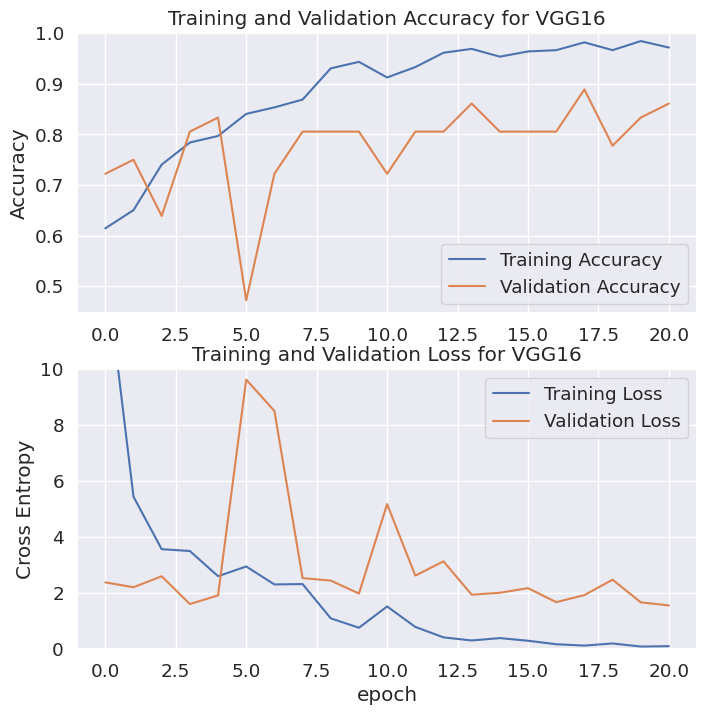

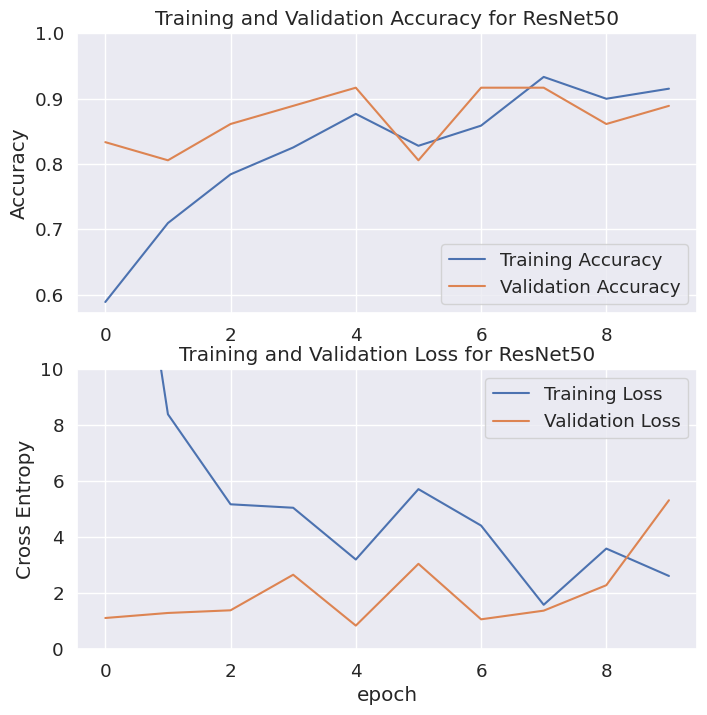

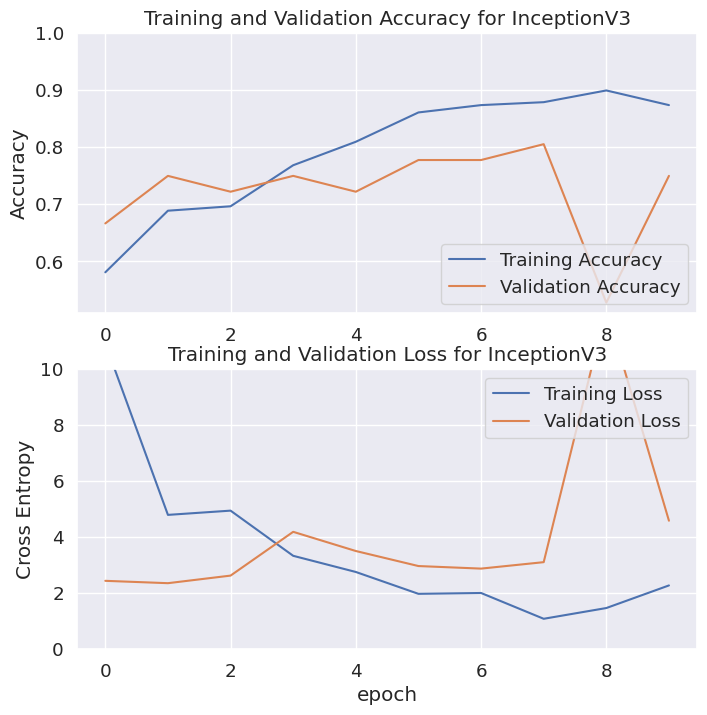

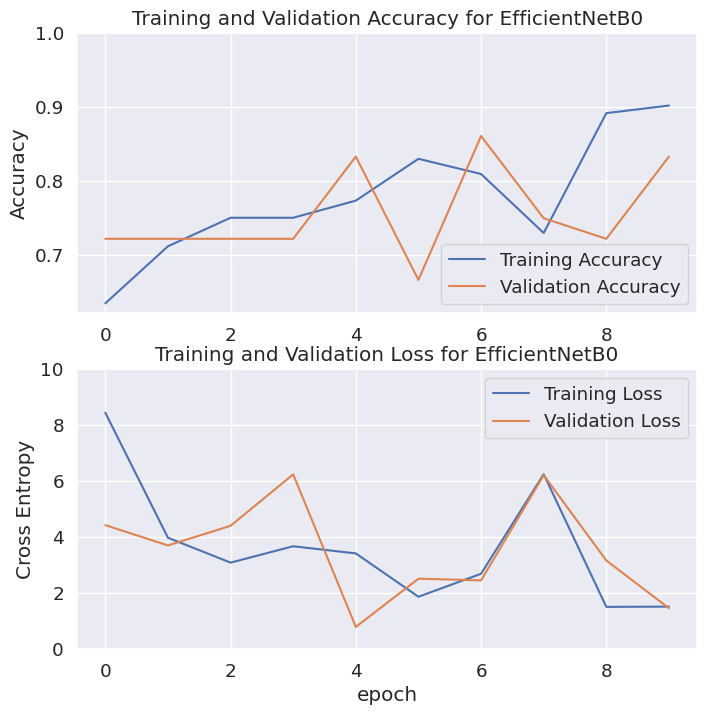

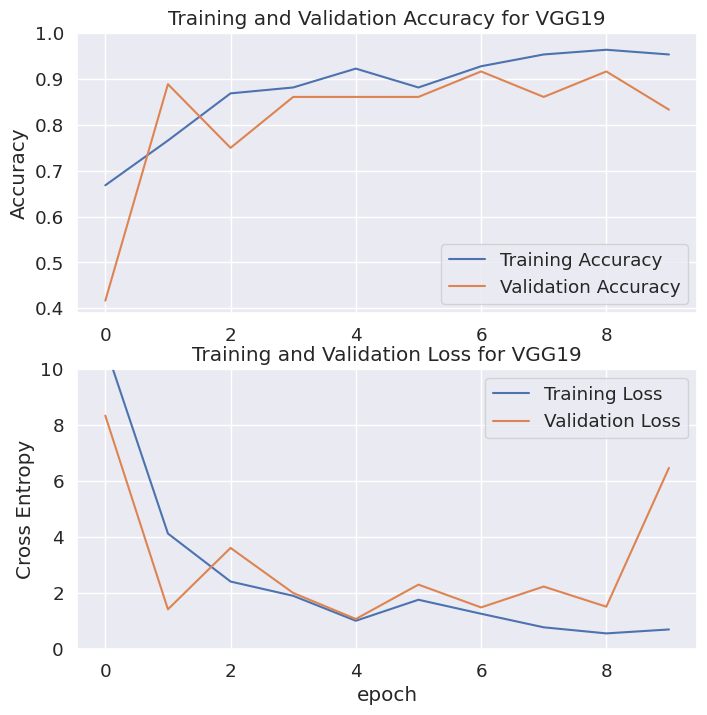

In [105]:
graph(history, 'VGG16')
graph(history2, 'ResNet50')
graph(history3, 'InceptionV3')
graph(history4, 'EfficientNetB0')
graph(history5, 'VGG19')

Note: If you are wondering why the validation metrics are clearly better than the training metrics, the main factor is because layers like `tf.keras.layers.BatchNormalization` and `tf.keras.layers.Dropout` affect accuracy during training. They are turned off when calculating validation loss.

To a lesser extent, it is also because training metrics report the average for an epoch, while validation metrics are evaluated after the epoch, so validation metrics see a model that has trained slightly longer.

## Fine tuning
In the feature extraction experiment, you were only training a few layers on top of an MobileNetV2 base model. The weights of the pre-trained network were **not** updated during training.

One way to increase performance even further is to train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the classifier you added. The training process will force the weights to be tuned from generic feature maps to features associated specifically with the dataset.

Note: This should only be attempted after you have trained the top-level classifier with the pre-trained model set to non-trainable. If you add a randomly initialized classifier on top of a pre-trained model and attempt to train all layers jointly, the magnitude of the gradient updates will be too large (due to the random weights from the classifier) and your pre-trained model will forget what it has learned.

Also, you should try to fine-tune a small number of top layers rather than the whole MobileNet model. In most convolutional networks, the higher up a layer is, the more specialized it is. The first few layers learn very simple and generic features that generalize to almost all types of images. As you go higher up, the features are increasingly more specific to the dataset on which the model was trained. The goal of fine-tuning is to adapt these specialized features to work with the new dataset, rather than overwrite the generic learning.

### Un-freeze the top layers of the model


All you need to do is unfreeze the `base_model` and set the bottom layers to be un-trainable. Then, you should recompile the model (necessary for these changes to take effect), and resume training.

In [106]:
base_model1.trainable = True
base_model2.trainable = True
base_model3.trainable = True
base_model4.trainable = True
base_model5.trainable = True

In [107]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model1.layers))

# Fine-tune from this layer onwards
fine_tune_at = 16

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model1.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  19


In [108]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model2.layers))

# Fine-tune from this layer onwards
fine_tune_at = 169

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model2.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  175


In [109]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model3.layers))

# Fine-tune from this layer onwards
fine_tune_at = 294

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model3.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  311


In [110]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model4.layers))

# Fine-tune from this layer onwards
fine_tune_at = 230

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model4.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  238


In [111]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model5.layers))

# Fine-tune from this layer onwards
fine_tune_at = 17

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model5.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  22


### Compile the model

As you are training a much larger model and want to readapt the pretrained weights, it is important to use a lower learning rate at this stage. Otherwise, your model could overfit very quickly.

In [112]:
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [113]:
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [114]:
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [115]:
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [116]:
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0, name='accuracy')])

In [117]:
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 1024)              2569

In [118]:
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_1  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_12 (Dense)            (None, 1024)              1027

In [119]:
model3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_15 (Dense)            (None, 1024)              5242

In [120]:
model4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_18 (Dense)            (None, 1024)              64226304  
                                                                 
 dense_19 (Dense)            (None, 512)               524800    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                           

In [121]:
model5.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_3  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_3 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_24 (Dense)            (None, 1024)              2569

In [122]:
len(model1.trainable_variables)

10

In [123]:
len(model2.trainable_variables)

12

In [124]:
len(model3.trainable_variables)

14

In [125]:
len(model4.trainable_variables)

16

In [126]:
len(model5.trainable_variables)

14

### Continue training the model

If you trained to convergence earlier, this step will improve your accuracy by a few percentage points.

In [127]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine1 = model1.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset,
                         callbacks=[callbacks])

Epoch 10/20
39/39 [==============================] - 12s 216ms/step - loss: 0.3678 - accuracy: 0.9794 - val_loss: 1.0708 - val_accuracy: 0.9722
Epoch 11/20
39/39 [==============================] - 8s 162ms/step - loss: 0.1241 - accuracy: 0.9846 - val_loss: 1.2279 - val_accuracy: 0.9722
Epoch 12/20
39/39 [==============================] - 9s 204ms/step - loss: 0.2520 - accuracy: 0.9846 - val_loss: 1.1570 - val_accuracy: 0.9444
Epoch 13/20
39/39 [==============================] - 9s 202ms/step - loss: 0.3361 - accuracy: 0.9743 - val_loss: 2.0816 - val_accuracy: 0.8889
Epoch 14/20
39/39 [==============================] - 8s 163ms/step - loss: 0.0834 - accuracy: 0.9949 - val_loss: 2.0653 - val_accuracy: 0.9167
Epoch 15/20
39/39 [==============================] - ETA: 0s - loss: 1.6308e-04 - accuracy: 1.0000
Reached 99.5% accuracy so cancelling training!
39/39 [==============================] - 9s 180ms/step - loss: 1.6308e-04 - accuracy: 1.0000 - val_loss: 0.9765 - val_accuracy: 0.9722


In [128]:
history_fine2 = model2.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset,
                         callbacks=[callbacks])

Epoch 10/20
39/39 [==============================] - 16s 194ms/step - loss: 0.7117 - accuracy: 0.9666 - val_loss: 2.3618 - val_accuracy: 0.9167
Epoch 11/20
39/39 [==============================] - 9s 201ms/step - loss: 0.4565 - accuracy: 0.9743 - val_loss: 2.4858 - val_accuracy: 0.9167
Epoch 12/20
39/39 [==============================] - 9s 193ms/step - loss: 0.6163 - accuracy: 0.9717 - val_loss: 3.4057 - val_accuracy: 0.8889
Epoch 13/20
39/39 [==============================] - 8s 164ms/step - loss: 0.2506 - accuracy: 0.9717 - val_loss: 3.1889 - val_accuracy: 0.8889
Epoch 14/20
39/39 [==============================] - 8s 162ms/step - loss: 0.2006 - accuracy: 0.9871 - val_loss: 1.0085 - val_accuracy: 0.8889
Epoch 15/20
39/39 [==============================] - 9s 164ms/step - loss: 0.4777 - accuracy: 0.9717 - val_loss: 5.7397 - val_accuracy: 0.8611
Epoch 16/20
39/39 [==============================] - 9s 204ms/step - loss: 0.1417 - accuracy: 0.9923 - val_loss: 4.4107 - val_accuracy: 0.888

In [129]:
history_fine3 = model3.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset,
                         callbacks=[callbacks])

Epoch 10/20
39/39 [==============================] - 21s 314ms/step - loss: 0.6914 - accuracy: 0.9383 - val_loss: 5.1258 - val_accuracy: 0.6944
Epoch 11/20
39/39 [==============================] - 9s 198ms/step - loss: 0.9470 - accuracy: 0.9306 - val_loss: 3.6561 - val_accuracy: 0.7500
Epoch 12/20
39/39 [==============================] - 9s 189ms/step - loss: 0.4362 - accuracy: 0.9486 - val_loss: 6.2462 - val_accuracy: 0.6667
Epoch 13/20
39/39 [==============================] - 7s 159ms/step - loss: 0.4777 - accuracy: 0.9614 - val_loss: 8.4352 - val_accuracy: 0.6111
Epoch 14/20
39/39 [==============================] - 9s 191ms/step - loss: 0.2213 - accuracy: 0.9717 - val_loss: 5.4291 - val_accuracy: 0.6667
Epoch 15/20
39/39 [==============================] - 9s 192ms/step - loss: 0.2592 - accuracy: 0.9640 - val_loss: 3.7149 - val_accuracy: 0.8056
Epoch 16/20
39/39 [==============================] - 8s 166ms/step - loss: 0.3000 - accuracy: 0.9717 - val_loss: 3.6381 - val_accuracy: 0.805

In [130]:
history_fine4 = model4.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset,
                         callbacks=[callbacks])

Epoch 10/20
39/39 [==============================] - 21s 231ms/step - loss: 0.9863 - accuracy: 0.9332 - val_loss: 1.7321 - val_accuracy: 0.7778
Epoch 11/20
39/39 [==============================] - 7s 158ms/step - loss: 0.7459 - accuracy: 0.9280 - val_loss: 2.7010 - val_accuracy: 0.8889
Epoch 12/20
39/39 [==============================] - 9s 195ms/step - loss: 0.8936 - accuracy: 0.9229 - val_loss: 1.8062 - val_accuracy: 0.8611
Epoch 13/20
39/39 [==============================] - 9s 190ms/step - loss: 0.6943 - accuracy: 0.9383 - val_loss: 1.0454 - val_accuracy: 0.8611
Epoch 14/20
39/39 [==============================] - 7s 158ms/step - loss: 0.5210 - accuracy: 0.9486 - val_loss: 2.1313 - val_accuracy: 0.8889
Epoch 15/20
39/39 [==============================] - 9s 195ms/step - loss: 0.5846 - accuracy: 0.9563 - val_loss: 1.8162 - val_accuracy: 0.8889
Epoch 16/20
39/39 [==============================] - 9s 192ms/step - loss: 0.5670 - accuracy: 0.9486 - val_loss: 1.0733 - val_accuracy: 0.888

In [131]:
history_fine5 = model5.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset,
                         callbacks=[callbacks])

Epoch 10/20
39/39 [==============================] - 12s 193ms/step - loss: 1.3586 - accuracy: 0.9280 - val_loss: 4.6830 - val_accuracy: 0.7500
Epoch 11/20
39/39 [==============================] - 9s 171ms/step - loss: 0.6758 - accuracy: 0.9666 - val_loss: 4.3931 - val_accuracy: 0.8611
Epoch 12/20
39/39 [==============================] - 9s 208ms/step - loss: 0.4643 - accuracy: 0.9692 - val_loss: 1.3886 - val_accuracy: 0.8611
Epoch 13/20
39/39 [==============================] - 10s 218ms/step - loss: 0.3797 - accuracy: 0.9589 - val_loss: 1.9789 - val_accuracy: 0.8611
Epoch 14/20
39/39 [==============================] - 8s 170ms/step - loss: 0.1758 - accuracy: 0.9794 - val_loss: 3.6632 - val_accuracy: 0.8611
Epoch 15/20
39/39 [==============================] - 9s 210ms/step - loss: 0.1994 - accuracy: 0.9743 - val_loss: 1.8387 - val_accuracy: 0.8611
Epoch 16/20
39/39 [==============================] - 9s 202ms/step - loss: 0.1215 - accuracy: 0.9820 - val_loss: 2.0249 - val_accuracy: 0.88

Let's take a look at the learning curves of the training and validation accuracy/loss when fine-tuning the last few layers of the MobileNetV2 base model and training the classifier on top of it. The validation loss is much higher than the training loss, so you may get some overfitting.

You may also get some overfitting as the new training set is relatively small and similar to the original MobileNetV2 datasets.


In [132]:
acc1 = history1.history['accuracy']
test_acc1 = history1.history['val_accuracy']

loss1 = history1.history['loss']
test_loss1 = history1.history['val_loss']



acc2 = history2.history['accuracy']
test_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
test_loss2 = history2.history['val_loss']



acc3 = history3.history['accuracy']
test_acc3 = history3.history['val_accuracy']

loss3 = history3.history['loss']
test_loss3 = history3.history['val_loss']



acc4 = history4.history['accuracy']
test_acc4 = history4.history['val_accuracy']

loss4 = history4.history['loss']
test_loss4 = history4.history['val_loss']



acc5 = history5.history['accuracy']
test_acc5 = history5.history['val_accuracy']

loss5 = history5.history['loss']
test_loss5 = history5.history['val_loss']

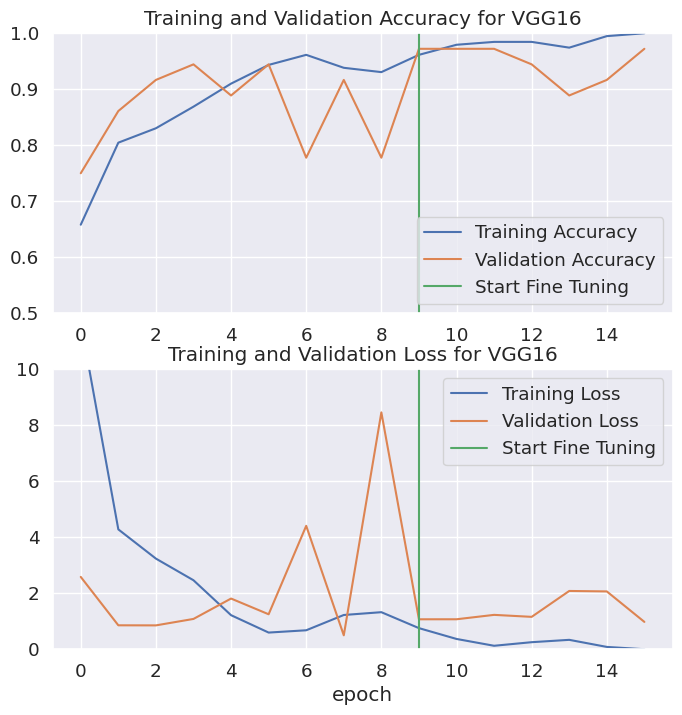

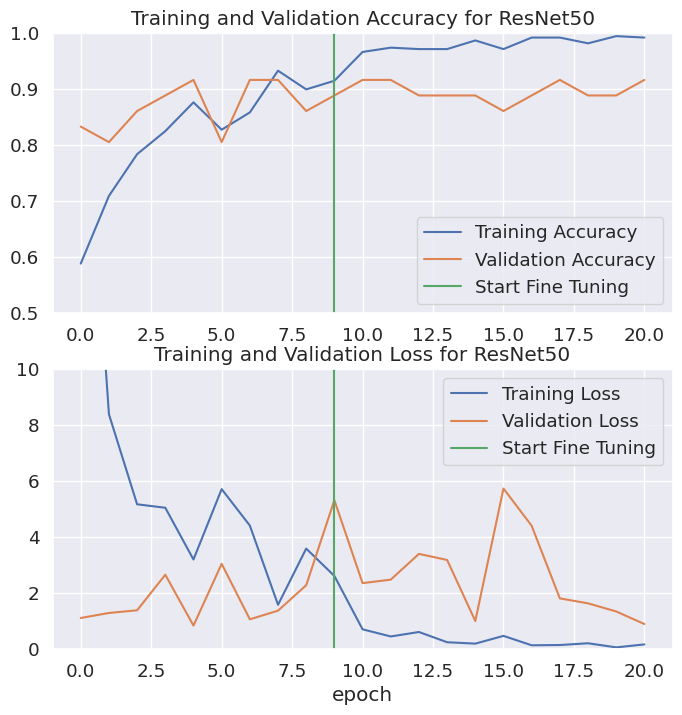

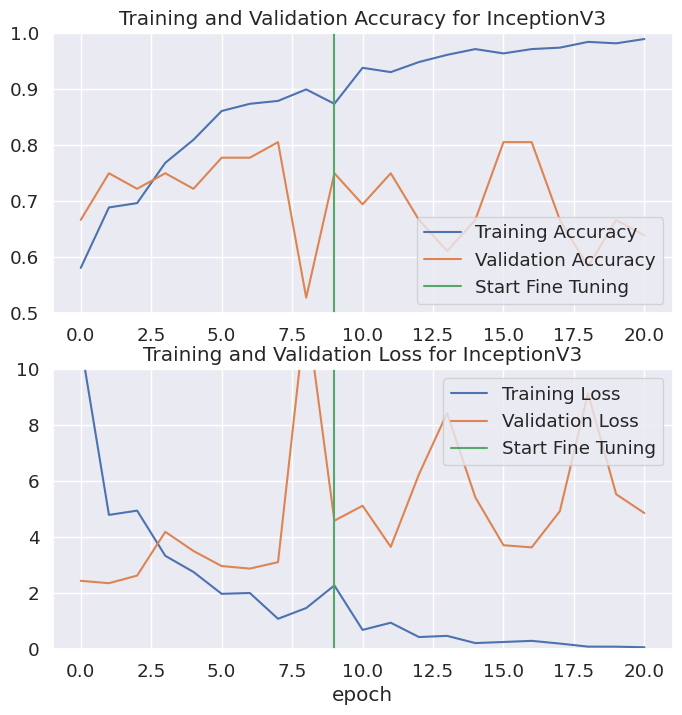

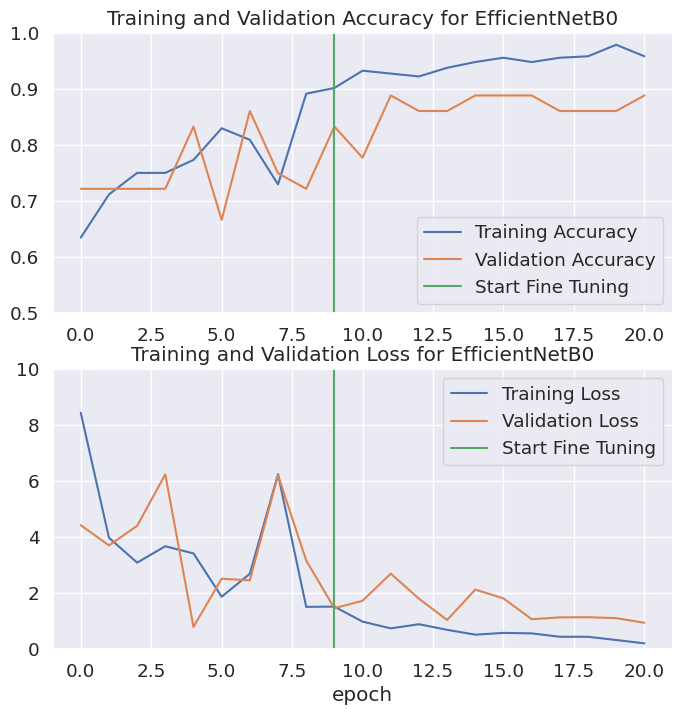

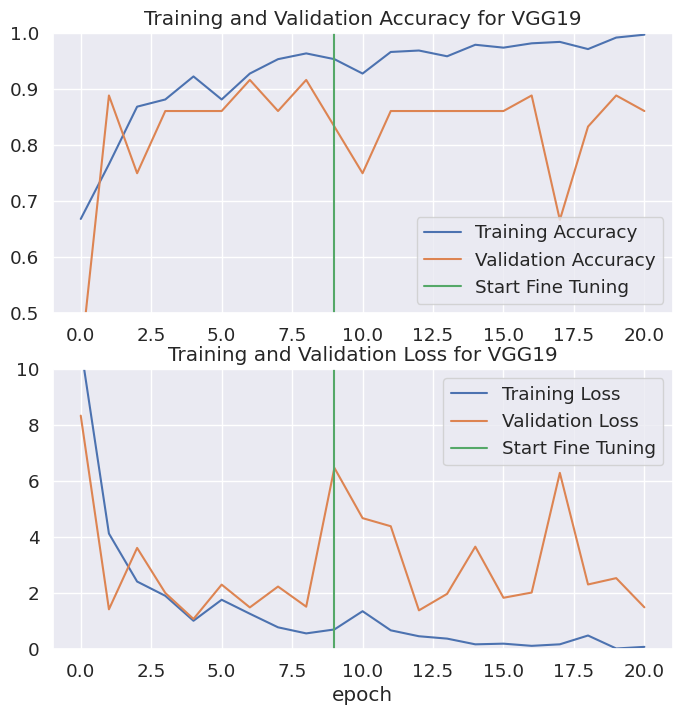

In [133]:
fine_tuned_graph(history_fine1, acc1, test_acc1, loss1, test_loss1, 'VGG16')
fine_tuned_graph(history_fine2, acc2, test_acc2, loss2, test_loss2, 'ResNet50')
fine_tuned_graph(history_fine3, acc3, test_acc3, loss3, test_loss3, 'InceptionV3')
fine_tuned_graph(history_fine4, acc4, test_acc4, loss4, test_loss4, 'EfficientNetB0')
fine_tuned_graph(history_fine5, acc5, test_acc5, loss5, test_loss5, 'VGG19')

### Evaluation and prediction

Finally you can verify the performance of the model on new data using test set.

In [134]:
loss, accuracy = model1.evaluate(test_dataset)
print('Test accuracy :', accuracy)

4/4 [==============================] - 1s 73ms/step - loss: 0.9765 - accuracy: 0.9722
Test accuracy : 0.9722222089767456


In [135]:
loss, accuracy = model2.evaluate(test_dataset)
print('Test accuracy :', accuracy)

4/4 [==============================] - 1s 38ms/step - loss: 0.9012 - accuracy: 0.9167
Test accuracy : 0.9166666865348816


In [136]:
loss, accuracy = model3.evaluate(test_dataset)
print('Test accuracy :', accuracy)

4/4 [==============================] - 1s 32ms/step - loss: 4.8635 - accuracy: 0.6389
Test accuracy : 0.6388888955116272


In [137]:
loss, accuracy = model4.evaluate(test_dataset)
print('Test accuracy :', accuracy)

4/4 [==============================] - 1s 29ms/step - loss: 0.9450 - accuracy: 0.8889
Test accuracy : 0.8888888955116272


In [138]:
loss, accuracy = model5.evaluate(test_dataset)
print('Test accuracy :', accuracy)

4/4 [==============================] - 1s 74ms/step - loss: 1.4978 - accuracy: 0.8611
Test accuracy : 0.8611111044883728


And now you are all set to use this model to predict if your pill's are good or bad

Predictions:
 [0 0 0 1 1 1 1 0 1 1]
Labels:
 [0 0 0 1 1 0 1 0 1 1]


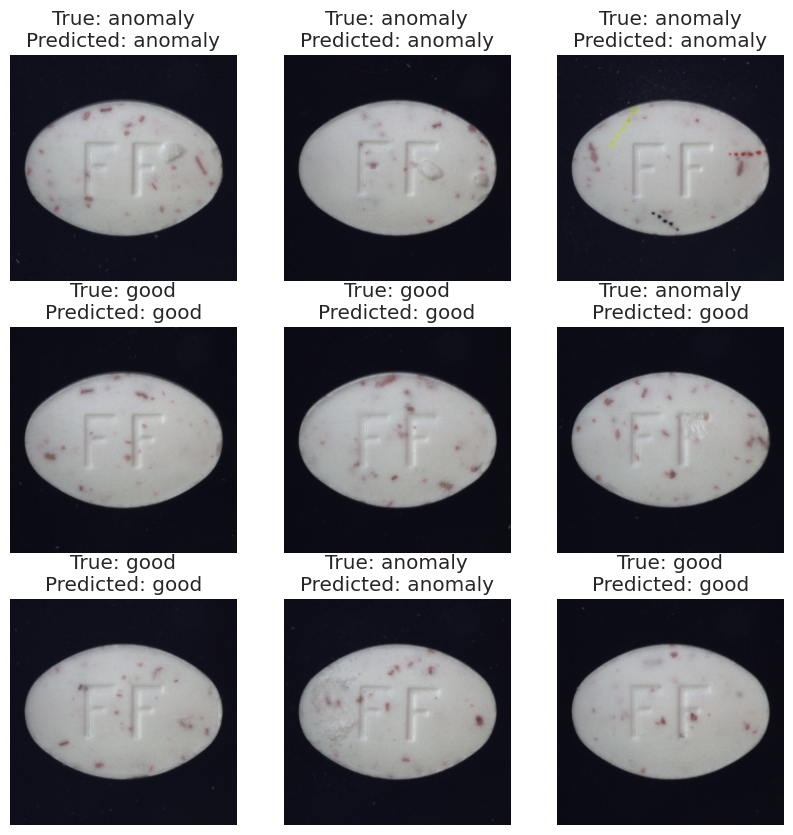

In [159]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model1.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  true_label = class_names[label_batch[i]]  # Get the true label
  predicted_label = class_names[predictions[i]]  # Get the predicted label
  title = f"True: {true_label}\nPredicted: {predicted_label}"
  plt.title(title)
  plt.axis("off")

4/4 [==============================] - 1s 76ms/step
tf.Tensor([0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1], shape=(36,), dtype=int32)
tf.Tensor([0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1], shape=(36,), dtype=int32)
[[ 3  7]
 [ 6 20]]
              precision    recall  f1-score   support

        Good      0.333     0.300     0.316        10
     Anomaly      0.741     0.769     0.755        26

    accuracy                          0.639        36
   macro avg      0.537     0.535     0.535        36
weighted avg      0.628     0.639     0.633        36



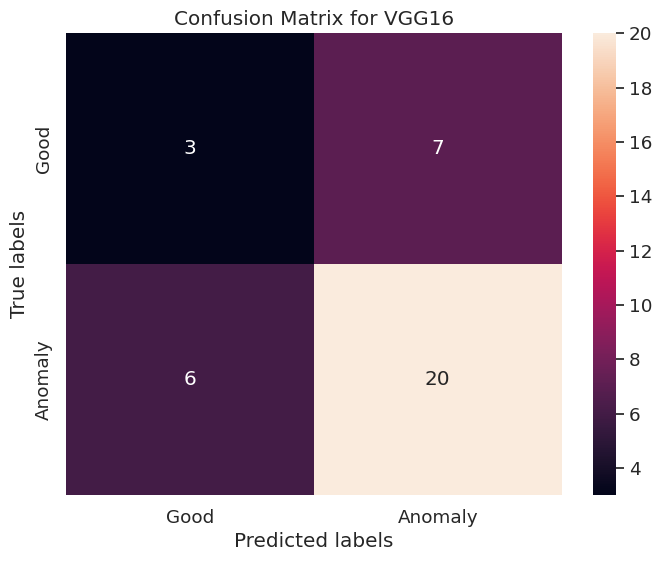

In [140]:
y_pred1 = model1.predict(test_dataset)
preds1 = tf.nn.sigmoid(y_pred1.flatten())
predicted_categories1 = tf.where(preds1 < 0.5, 0, 1)
print(predicted_categories1)
true_categories1  = tf.concat([y for x, y in test_dataset], axis=0)
print(true_categories1)
confusion_mat1 = confusion_matrix(true_categories1, predicted_categories1)
print(confusion_mat1)
print(classification_report(true_categories1, predicted_categories1, digits=3, target_names=['Good', 'Anomaly']))
class_labels = ["Good", "Anomaly"]  # Replace with your class labels

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat1, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for VGG16')
plt.show()

Predictions:
 [1 1 0 1 0 0 1 1 1 1]
Labels:
 [1 0 1 1 0 0 1 1 1 1]


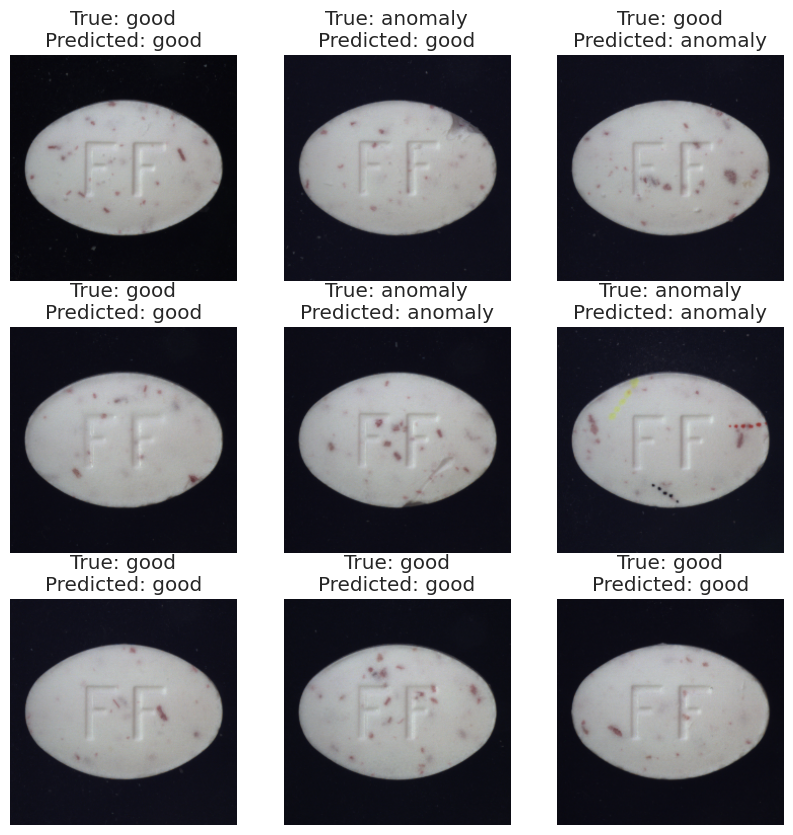

In [160]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model2.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  true_label = class_names[label_batch[i]]  # Get the true label
  predicted_label = class_names[predictions[i]]  # Get the predicted label
  title = f"True: {true_label}\nPredicted: {predicted_label}"
  plt.title(title)
  plt.axis("off")

4/4 [==============================] - 2s 50ms/step
tf.Tensor([1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1], shape=(36,), dtype=int32)
tf.Tensor([1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1], shape=(36,), dtype=int32)
[[ 3  7]
 [ 6 20]]
              precision    recall  f1-score   support

        Good      0.333     0.300     0.316        10
     Anomaly      0.741     0.769     0.755        26

    accuracy                          0.639        36
   macro avg      0.537     0.535     0.535        36
weighted avg      0.628     0.639     0.633        36



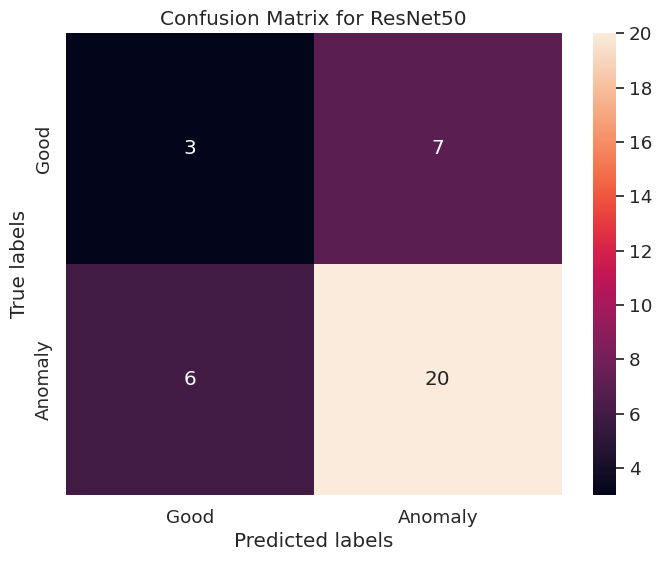

In [142]:
y_pred2 = model2.predict(test_dataset)
preds2 = tf.nn.sigmoid(y_pred2.flatten())
predicted_categories2 = tf.where(preds2 < 0.5, 0, 1)
print(predicted_categories2)
true_categories2  = tf.concat([y for x, y in test_dataset], axis=0)
print(true_categories2)
confusion_mat2 = confusion_matrix(true_categories2, predicted_categories2)
print(confusion_mat2)
print(classification_report(true_categories2, predicted_categories2, digits=3, target_names=['Good', 'Anomaly']))
class_labels = ["Good", "Anomaly"]  # Replace with your class labels

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat2, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for ResNet50')
plt.show()

Predictions:
 [0 0 0 1 0 1 1 1 0 1]
Labels:
 [0 1 1 1 0 1 1 1 0 0]


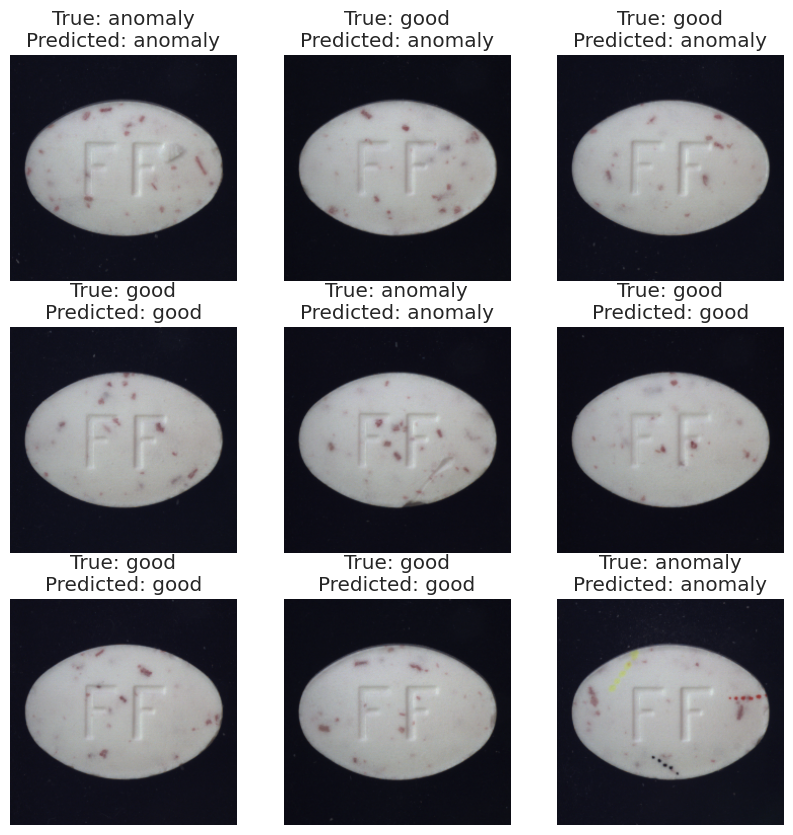

In [161]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model3.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  true_label = class_names[label_batch[i]]  # Get the true label
  predicted_label = class_names[predictions[i]]  # Get the predicted label
  title = f"True: {true_label}\nPredicted: {predicted_label}"
  plt.title(title)
  plt.axis("off")

4/4 [==============================] - 2s 47ms/step
tf.Tensor([1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0], shape=(36,), dtype=int32)
tf.Tensor([1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1], shape=(36,), dtype=int32)
[[ 3  7]
 [ 6 20]]
              precision    recall  f1-score   support

        Good      0.263     0.500     0.345        10
     Anomaly      0.706     0.462     0.558        26

    accuracy                          0.472        36
   macro avg      0.485     0.481     0.451        36
weighted avg      0.583     0.472     0.499        36



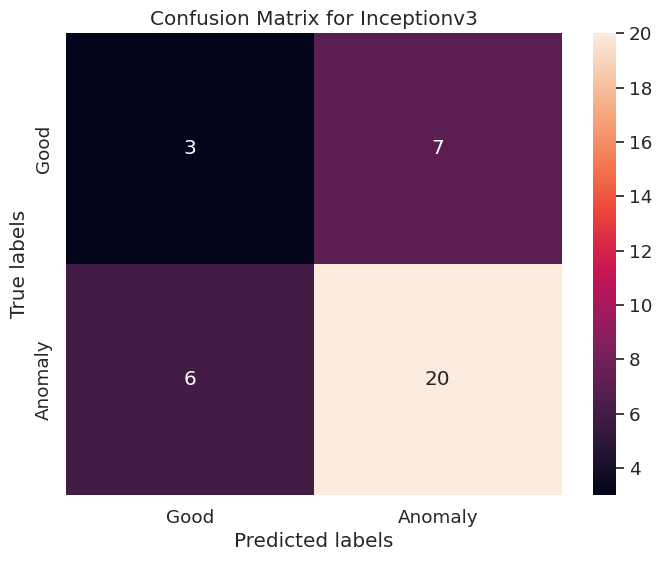

In [144]:
y_pred3 = model3.predict(test_dataset)
preds3 = tf.nn.sigmoid(y_pred3.flatten())
predicted_categories3 = tf.where(preds3 < 0.5, 0, 1)
print(predicted_categories3)
true_categories3  = tf.concat([y for x, y in test_dataset], axis=0)
print(true_categories3)
confusion_mat3 = confusion_matrix(true_categories2, predicted_categories2)
print(confusion_mat3)
print(classification_report(true_categories3, predicted_categories3, digits=3, target_names=['Good', 'Anomaly']))
class_labels = ["Good", "Anomaly"]  # Replace with your class labels

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat3, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Inceptionv3')
plt.show()

Predictions:
 [0 1 1 0 0 1 1 1 1 1]
Labels:
 [0 1 1 0 0 1 1 1 1 1]


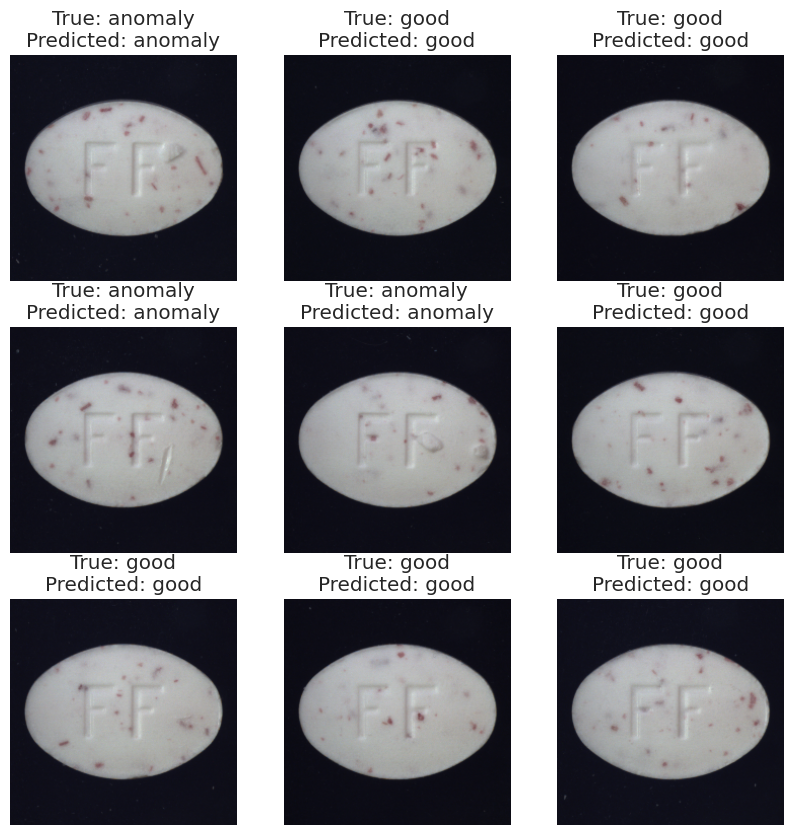

In [162]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model4.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  true_label = class_names[label_batch[i]]  # Get the true label
  predicted_label = class_names[predictions[i]]  # Get the predicted label
  title = f"True: {true_label}\nPredicted: {predicted_label}"
  plt.title(title)
  plt.axis("off")

4/4 [==============================] - 3s 32ms/step
tf.Tensor([1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1], shape=(36,), dtype=int32)
tf.Tensor([1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0], shape=(36,), dtype=int32)
[[ 4  6]
 [ 6 20]]
              precision    recall  f1-score   support

        Good      0.400     0.400     0.400        10
     Anomaly      0.769     0.769     0.769        26

    accuracy                          0.667        36
   macro avg      0.585     0.585     0.585        36
weighted avg      0.667     0.667     0.667        36



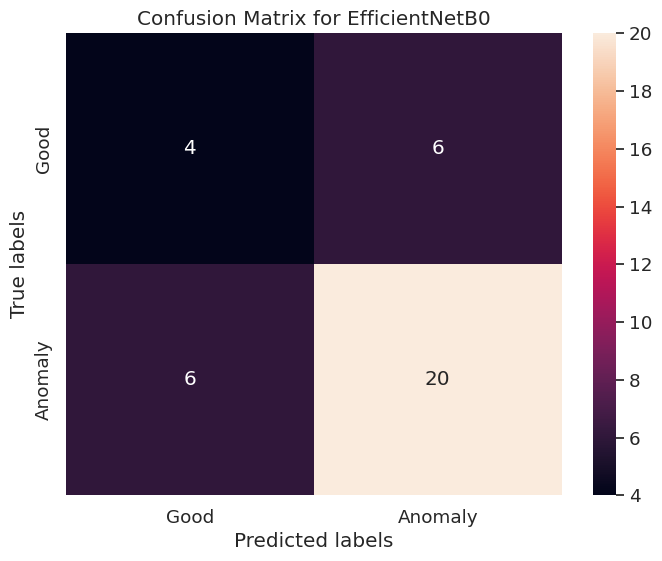

In [146]:
y_pred4 = model4.predict(test_dataset)
preds4 = tf.nn.sigmoid(y_pred4.flatten())
predicted_categories4 = tf.where(preds4 < 0.5, 0, 1)
print(predicted_categories4)
true_categories4  = tf.concat([y for x, y in test_dataset], axis=0)
print(true_categories4)
confusion_mat4 = confusion_matrix(true_categories4, predicted_categories4)
print(confusion_mat4)
print(classification_report(true_categories4, predicted_categories4, digits=3, target_names=['Good', 'Anomaly']))
class_labels = ["Good", "Anomaly"]  # Replace with your class labels

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat4, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for EfficientNetB0')
plt.show()

Predictions:
 [1 1 1 0 1 1 1 1 1 1]
Labels:
 [1 1 1 0 1 1 1 1 1 0]


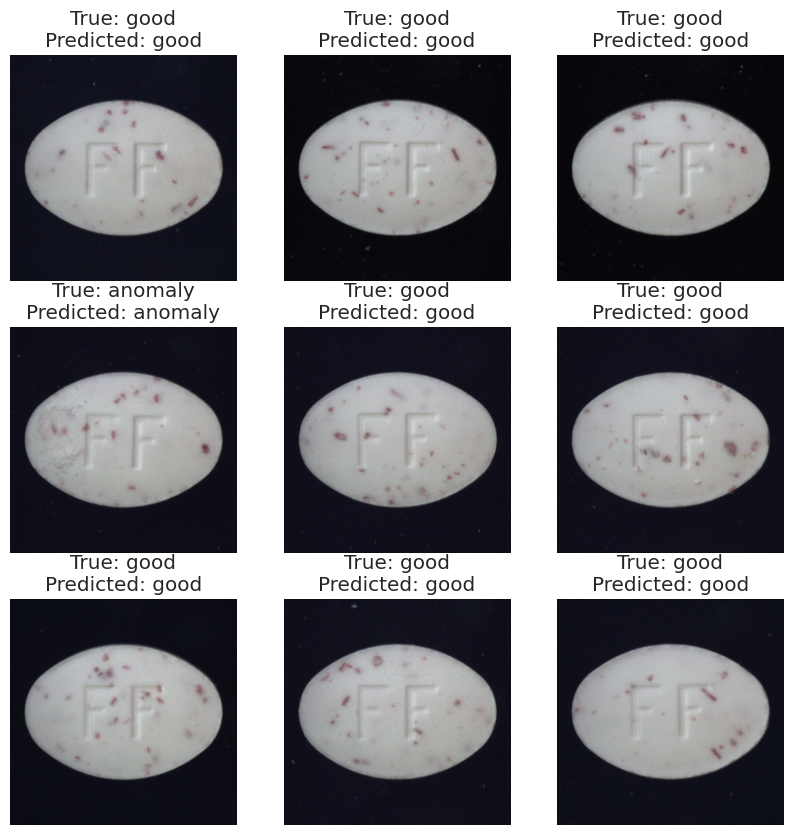

In [163]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model5.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  true_label = class_names[label_batch[i]]  # Get the true label
  predicted_label = class_names[predictions[i]]  # Get the predicted label
  title = f"True: {true_label}\nPredicted: {predicted_label}"
  plt.title(title)
  plt.axis("off")

4/4 [==============================] - 1s 84ms/step
tf.Tensor([1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1], shape=(36,), dtype=int32)
tf.Tensor([1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1], shape=(36,), dtype=int32)
[[ 4  6]
 [ 6 20]]
              precision    recall  f1-score   support

        Good      0.429     0.300     0.353        10
     Anomaly      0.759     0.846     0.800        26

    accuracy                          0.694        36
   macro avg      0.594     0.573     0.576        36
weighted avg      0.667     0.694     0.676        36



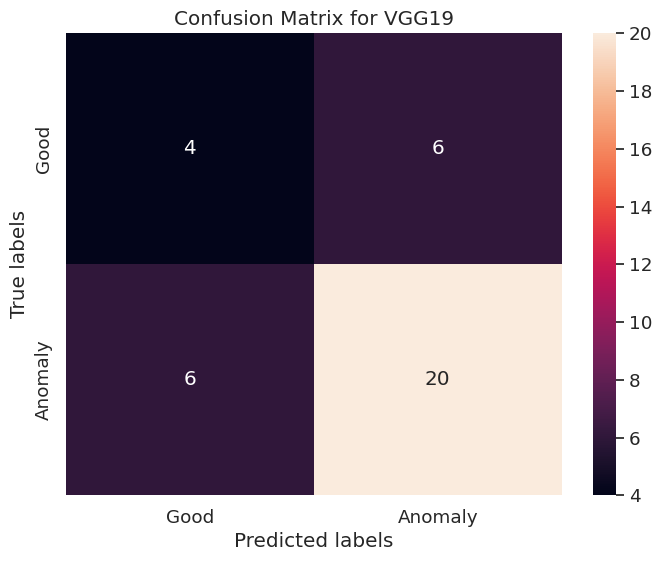

In [148]:
y_pred5 = model5.predict(test_dataset)
preds5 = tf.nn.sigmoid(y_pred5.flatten())
predicted_categories5 = tf.where(preds5 < 0.5, 0, 1)
print(predicted_categories4)
true_categories5 = tf.concat([y for x, y in test_dataset], axis=0)
print(true_categories5)
confusion_mat5 = confusion_matrix(true_categories5, predicted_categories4)
print(confusion_mat5)
print(classification_report(true_categories5, predicted_categories5, digits=3, target_names=['Good', 'Anomaly']))
class_labels = ["Good", "Anomaly"]  # Replace with your class labels

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat5, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for VGG19')
plt.show()

In [ ]:
#train teh best model with the test set
history_final = model1.fit(test_dataset, epochs=10)

In [ ]:
import tf2onnx
#save the model
model1.save("vgg16_custom")
# Load the TensorFlow SavedModel
tf_model_path = "/content/vgg16_custom"
onnx_model_path = "/content/.onnx"

# Convert the TensorFlow model to ONNX format
onnx_model, _ = tf2onnx.convert.from_saved_model(tf_model_path)

# Save the ONNX model to a file
with open(onnx_model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"Model successfully converted to ONNX and saved to {onnx_model_path}")